# SC1003 Mini Project Group 1

# Code Explanation (part 1-3)

## Flowchart


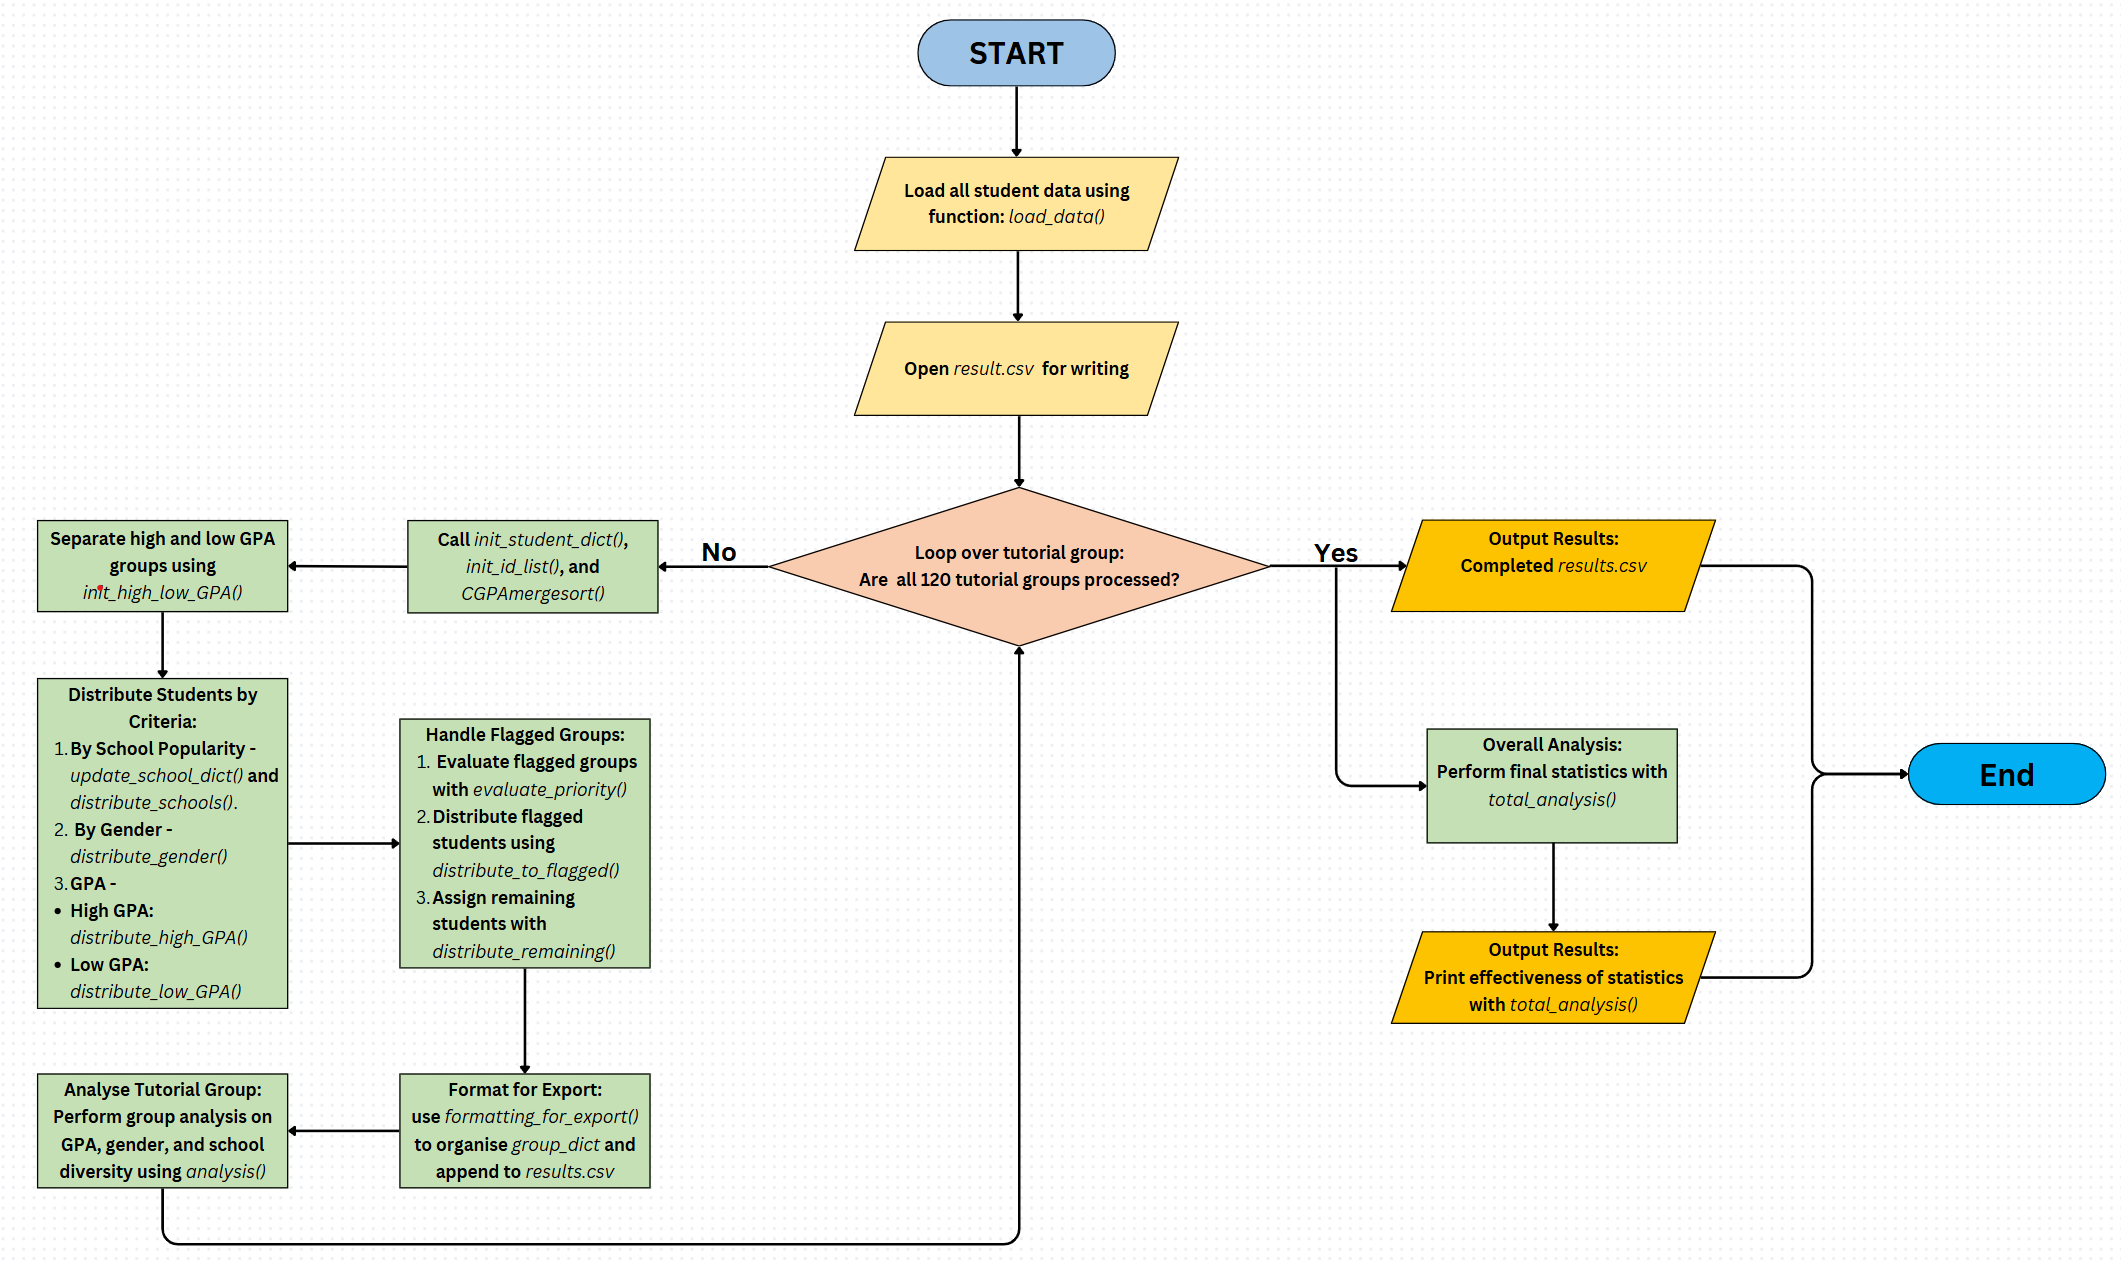

## Pseudocode

Start

     function main():
     
     #Load students into a list
     all_students = load_data()
     
     #Create a CSV file relevant headings headings
     open file for writing:
     write “ Tutorial Group, Student ID,

     # Loop through 120 Tutorial Group
     FOR i FROM 0 to 119:

          #Initialise dictionary containing student data for 1 TG, easier read
          students_dict = init_new_dict(all_students)

          #Initialise list of student IDs
          id_list = init_id_list(all_students)

          Remove first 50 students from all_students

          #Sort students based on CGPA in ascending order
          sorted_GPA = CGPAmergesort(id_list, students_dict)

          # initialise dictionary for each group
          group_dict = initialise_groups()
          
          #separate top 10 and bottom 10 students according to their CGPA
          high_GPA, low_GPA = init_high_low_GPA(sorted_CGPA)

          # Identify the popular schools from the middle 30
          popular_schools = find_popular_schools(school_dict)

          # assign first 10 students from the popular_schools to 10 tutorial groups, and remove these 10 from sorted_CGPA list
          distribute_schools(sorted_CGPA, popular_schools, students_dict, group_dict)

          #assign second student in each group opposite to the gen nder of the first student, and remove it from the sorted_CGPA list
          distribute_gender(sorted_CGPA, students_dict, group_dict)

          #exhaust high-GPA list by assigning third student to each group from the to         high_GPA list
          distribute_high_GPA( high_GPA,students_dict, group_dict)

          #exhaust low_GPA list by assigning fourth student to each group from the low_GPA list

          #identify groups where three out of four students are of the same gender
          flagged_groups = evaluate_priority(group_dict)

          # distribute students from sorted_CGPA list to flagged groups based on gender priority
          distribute_to_flagged(flagged_groups, sorted_CGPA, students_dict, group_dict)

          #assign remaining students from from sorted_CGPA list to remaining groups
          distribute_remaining(sorted_CGPA, students_dict, group_dict)


          #formatting the results for export to FCE2_Team1.csv file
          results = formatting_for_export(group_dict)

          # export ( results )
          
          # analyse the distribution of students for the current tutorial group
          tut_grp = students_dict[high_GPA][0][0]
          analysis( tut_grp, students_dict, group_dict, id_list)

     END FOR

     # analysis compared to all 120 tutorial groups
     total_analysis()

END    

## Code:

In [ ]:
def load_data():
    all_students_list = []
    with open("FCE2_Team1.csv", "r") as myfile:
        p = myfile.readlines()[1:]
        for i in p:
            x = i.split(",")
            all_students_list.append(x)
    return all_students_list

In [ ]:
def init_new_dict(students_list):
    students_dict = {}
    for i in range(50):
        x = students_list[i]
        students_dict.update({int(x[1]) : [x[0] , int(x[1]) , x[2] , x[3] , x[4] , float(x[5].split("\n")[0])]})
    return students_dict

**Function: *init_new_dict***

This function returns a dictionary whose keys represent each student’s ID and whose values represent that particular student’s data. This is for easier readability as the data is relevant for the following functions.

In [ ]:
def init_id_list(all_students_list):
    id_list = []
    for i in range(50):
        id_list.append(int(all_students_list[i][1]))
    return id_list

**Function: *init_id_list***

This function returns a list whose elements are the IDs of the students in the current tutorial group. We made this as an input for later on function called CGPAmergesort.

In [ ]:
def CGPAmergesort(theIDs, mydict):
    dictlen = len(theIDs)

    if dictlen < 2:
        return theIDs

    leftID = theIDs[:dictlen // 2]
    rightID = theIDs[dictlen // 2:]

    leftID = CGPAmergesort(leftID, mydict)
    rightID = CGPAmergesort(rightID, mydict)

    return CGPAmerge(leftID , rightID, mydict)

def CGPAmerge(leftID , rightID, mydict):
    resultIDlist = []

    while leftID and rightID:
        L = leftID[0]
        R = rightID[0]

        if float(mydict[L][5]) >= float(mydict[R][5]):
            resultIDlist.append(L)
            leftID.pop(0)
        else:
            resultIDlist.append(R)
            rightID.pop(0)

    if leftID:
        resultIDlist.extend(leftID)
    else:
        resultIDlist.extend(rightID)

    return resultIDlist

**Function: *CGPAmergesort***

This function returns a list where the elements are the IDs of the students sorted based on their CGPA ( derived from student_dict ) in an ascending order. This is so that we can separate the top 10 students, bottom 10 students and the middle 30 students. We went ahead with merge sort as it is more time efficient compared to bubble sort.


In [ ]:
def initialise_groups():
    group_dict = {}
    for i in range(10):
        group_dict[f"Group{i}"] = []
    return group_dict

**Function: *initialise_groups***

This function returns a dictionary whose keys are the group number and its values are empty lists. The lists will be populated later on, where each list will be filled with 5 students assigned to that particular group.

In [ ]:
def init_high_low_GPA(sorted_CGPA):
    high_GPA = []
    low_GPA = []
    for i in range(10):
        high_student = sorted_CGPA[0]
        high_GPA.append(high_student)
        sorted_CGPA.remove(high_student)

        low_student = sorted_CGPA[-1]
        low_GPA.append(low_student)
        sorted_CGPA.remove(low_student)
    return high_GPA, low_GPA


**Function: *init_high_low_GPA***

This function returns 2 lists. Their elements are the the top 10 students in terms of their CGPA, and the bottom 10 students respectively. We derive the data from sorted_CGPA list. Afterwhich, we remove these students from the sorted_CGPA list. This is so that we can assign the remaining students in the sorted_CGPA based solely on the gender and school criteria.

# Code Explanation (part 4-6)

Next, we will move on to assigning each student in the tutorial group of 50 into 10 groups of 5.

For our approach, we start by assigning the first student according to school. Since we have previously removed the top 10 and bottom 10 CGPA annomalies into *high_GPA* and *low_GPA* respectively, we are left with a sample size of the middle 30 students.

These 30 students are deemed as the students with average CGPA. Hence, it is safe to assume that the average CGPA of these students does not deviate much from each other.

Thus, we then divert our focus to arranging the groups based on the remaining 2 factors, School and Gender.

In [ ]:
def init_school_dict(sorted_CGPA, students_dict):
    school_dict = {}
    for i in range(30):
        school = students_dict.get(sorted_CGPA[i])[2]
        if school not in school_dict:
            school_dict[school] = 1
        else:
            school_dict[school] += 1
    return school_dict

**Function: *init_school_dict***

Creates a dictionary

*sorted_CGPA*: list of students ID according to CGPA, from highest to lowest

*students_dict*: dictionary of students from *FCE2_Team1.csv*, key = Student ID

According to student's school, if the school exists as a key in the dictionary (*school_dict*), we increment the value of the key(*school*) by 1.

If the school does not exist as a key in the dictionary, we append the dictionary with the school as key, with a value of 1.

It will then return the dictionary (*school_dict*) with key as schools and values as number of students in the corresponding school.

In [ ]:
def find_popular_schools(school_dict):
    popular_schools = []
    count = 0

    while count < 10:
        school = max(school_dict,key=school_dict.get)
        no_of_students = school_dict[school]
        count += no_of_students
        popular_schools.append(school)
        school_dict.pop(school)

    return popular_schools

**Function: *find_popular_schools***

Creates an empty list (*popular_schools*)

returns a list of schools containing at least 10 students, starting from the most popular school.

In [ ]:
def distribute_schools(sorted_CGPA, popular_schools, students_dict, group_dict):
    delete_list = []
    counter = 0
    for i in range(len(sorted_CGPA)):
        if students_dict[sorted_CGPA[i]][2] in popular_schools:
            if counter == 10:
                break
            group_dict[f"Group{counter}"].append(students_dict[sorted_CGPA[i]])
            delete_list.append(sorted_CGPA[i])
            counter+=1

    for i in delete_list:
        sorted_CGPA.remove(i)

**Function: *distribute_schools***

Creates an empty set (*delete_list*)

In the list of 30 students sorted by CGPA (*sorted_CGPA*), from highest to lowest, we will be taking the first 10 students from the list(*popular_schools*)

These students will then be appended into the dictionary for groupings (*group_dict*), and an empty list (*delete_list*), that will be containing these 10 student IDs.

Using the list (*delete_list*), it will be cross checked with the initial list of 30 students (*sorted_CGPA*), removing corresponding students from the list and thus reducing the remaining students down to 20.




In [ ]:
def distribute_gender(sorted_CGPA, students_dict, group_dict):
    male_list = []
    female_list = []

    for i in sorted_CGPA:
        if students_dict[i][4] == "Male":
            male_list.append(i)
        else:
            female_list.append(i)

    for i in group_dict:
        if group_dict[i][0][4] == "Male":
            if len(female_list) > 0:
                group_dict[i].append(students_dict[female_list[0]])
                sorted_CGPA.remove(female_list[0])
                female_list.remove(female_list[0])
            else:
                group_dict[i].append(students_dict[male_list[0]])
                sorted_CGPA.remove(male_list[0])
                male_list.remove(male_list[0])

        else:
            if len(male_list) > 0:
                group_dict[i].append(students_dict[male_list[0]])
                sorted_CGPA.remove(male_list[0])
                male_list.remove(male_list[0])
            else:
                group_dict[i].append(students_dict[female_list[0]])
                sorted_CGPA.remove(female_list[0])
                female_list.remove(female_list[0])

**Function: *distribute_gender***

In this function we will be sorting the second and third student of each group according to gender.

We begin by creating 2 lists, *male_list* for males and *female_list* for females. It will then go through *sorted_CGPA* to separate student IDs based on gender, into a *male_list* and *female_list*.

Next, for each assigned group, the function checks the gender of the existing student, and assigns the second student from either gendered list oppositely.

To prevent extreme scenarios where there is an overwhelming majority of a certain gender, it will check if the required gender list is exhausted, and if so, it will have no choice but to assign a student of the same gender.

As such, *group_dict* now contains 2 students per group.


Now, we will begin allocating the third and fourth student per group based on GPA. This will be done so by calling back our list of 10 students with the highest and lowest CGPA each, *high_GPA* and *low_GPA* respectively.

In [ ]:
def distribute_high_GPA(high_GPA, students_dict, group_dict):
    for i in range(len(high_GPA)):
        group_dict[f"Group{9-i}"].append(students_dict[high_GPA[i]])


**Function: *distribute_high_GPA***

Here, we will be allocating the third student throught the function *distribute_high_GPA*

This function distributes the students in *high_GPA* in reverse order into each of our tutorial group in *group_dict*.


**Rationale for reverse order:**

Previously from *CGPAmergesort* function, the lists of students in *sorted_CGPA* are sorted according to their CGPA, from highest to lowest.

Thus, for the first two students allocated per group, we are taking the first student down the lists that fits the respective criterias, Schools and Genders.

This results in a general descending trend of average CGPA per group from the first to the last group.

Hence, by reversing the the order of allocation for the students in *high_GPA*, we are allocating the student with the highest CGPA to the group with lowest average CGPA, vice versa, achieving a lower disparity in CGPA per group.

In [ ]:
def distribute_low_GPA(low_GPA, students_dict, group_dict):
    for i in range(len(low_GPA)):
        group_dict[f"Group{i}"].append(students_dict[low_GPA[i]])


**Function: *distribute_low_GPA***

Similarly, *distribute_low_GPA()* distributes the students in *low_GPA* into *group_dict*, without reversing the order.


**Explanation:**

As mentioned above, the average CGPA per group of size 2 has a descending trend.

By allocating the first group of 2, group 1, that has the highest initial average CGPA, with students with the lowest CGPA from both *low_GPA* and *high_GPA*, we will be bringing the average CGPA of the group of size 4, closer to the average CGPA of the entire tutorial group of size 50.

This process will be iterated until the last group, group 10 of size 2, that has the lowest initial average CGPA. They will be allocated with students with the highest CGPA from both *high_GPA* and *low_GPA*.

As a result, the allocation of the third and fourth student will help balance the average CGPA throughout the groups in *group_dict*.


# Code Explanation (part 7-8)

In [ ]:
# THIS WILL NOT BE USED IN OUR FINAL CODE
def lazy_distribute_remaining(sorted_CGPA, students_dict, group_dict):
    index = 0
    for i in group_dict:
        group_dict[i].append(students_dict[sorted_CGPA[index]])
        index+=1

**function: *lazy_distribute_remaining***

Now that we have 4 students for each of the Assigned Teams, the last student needs to be assigned strategically. We will be using the final 10 students from the sorted_CGPA list.

We ran this process through a function we named as *lazy_distribute_remaining*, which simply appends each student from the sorted_CGPA list into an Assigned Team, without any strategic consideration. These are the results that we were presented with after calling our *analysis* and *total_analysis* functions:

EFFECTIVENESS

GENDER: 73.5% PASSES

SCHOOLS: 99.83% PASSES

MAXIMUM DEVIATION: 0.11 POINTS

As seen from the statistics above, while the success rates for school and gpa distribution are good, the gender distribution does not produce a favourable result. Therefore, before distributing the last student to each group, we decided to consider the gender ratio of the existing 4 students.

In [ ]:
def evaluate_priority(group_dict):
    flagged_groups = []

    for i in group_dict:
        male = 0
        female = 0
        for j in group_dict[i]:
            if j[4] == "Male":
                male += 1
            else:
                female += 1

        if male >= 3 or female >= 3:
            str = ""
            if male > female:
                str = "Male"
            else:
                str = "Female"
            flagged_groups.append([i, str])
    return flagged_groups

**function: *function:evaluate_priority***

In our *evaluate_priority* function if 3 or more of these students are of the same gender, it appends the group name, as well as the majority gender, into a list called flagged_groups, and returns after iterating through all the groups.


In [ ]:
def distribute_to_flagged(flagged_groups, sorted_CGPA, students_dict, group_dict):
    delete_list = []
    for i in sorted_CGPA:
        for j in flagged_groups:
            if len(group_dict[j[0]]) != 5:
                if students_dict[i][4] != j[1]:
                    delete_list.append(i)
                    group_dict[j[0]].append(students_dict[i])
                    break

    for i in delete_list:
        sorted_CGPA.remove(i)

**function: *distribute_to_flagged***

Now that we have a list of flagged_groups, we pass this into a function called *distribute_to_flagged* which gives priority to these groups. Out of the 10 remaining students in sorted_CGPA, is assigns a student of the appropriate gender into the groups, to balance out the gender ratio. This leaves us with the flagged groups having 5 students each, while the remaining groups to have 4 students.

In [ ]:
def distribute_remaining(sorted_CGPA, students_dict, group_dict):
    index = 0
    for i in range(10):
        if len(group_dict[f"Group{i}"]) < 5:
            group_dict[f"Group{i}"].append(students_dict[sorted_CGPA[index]])
            index += 1

**function: *distribute_remaining***

We are now left with a set of completed and uncompleted Assigned groups. The function, *distribute_remaining* will distribute the remaining students from sorted_CGPA into uncompleted groups. This completes our algorithm for sorting the students. By calling *total_analysis* we are presented with much more favourable results:


EFFECTIVENESS

GENDER: 93.5% PASSES

SCHOOLS: 99.83% PASSES

MAXIMUM DEVIATION: 0.13 POINTS

In [ ]:
def formatting_for_export(group_dict):
    result_list = []
    string = ""
    for i in group_dict:
            for k in group_dict[i]:
                k.append(i)

    for i in group_dict:
        for j in group_dict[i]:
            for k in j:
                string += str(k)
                string += ","
            string = string[:-1]
            string += "\n"
            result_list.append(string)
            string = ""
    return result_list

def export(results):
    with open("FCE2_Team1.csv", "a",newline="") as results_file:
        for i in results:
            results_file.write(i)

**function: *formatting_for_export* and *export***

To finish our task, we use the *formatting_for_export* function to format our group_dict into a list form such that when we call our *export* function, it easily appends the data into our export file called FCE2_Team1.csv


In [ ]:
all_deviations = []
all_genders = []
all_schools = []

def main():
    # Load all students into a list
    all_students = load_data()

    # Create a clean csv file with relavant headings
    with open("FCE2_Team1.csv", "w") as file:
        file.write("Tutorial Group,Student ID,School,Name,Gender,CGPA,Team Assigned\n")

    # Loop for 120 tutorial groups
    for i in range(120):
        # Initialise dictionary containing student data in current tutorial group
        students_dict = init_new_dict(all_students)

        # Initialise list of student ids for easy reference
        id_list = init_id_list(all_students)

        # Remove the first 50 entries from all_students list
        all_students = all_students[50:]

        # Initialise sorted_CGPA which contains student ids in order of ascending GPAs
        sorted_CGPA = CGPAmergesort(id_list, students_dict)

        # Initialise dictionary for assigned groups
        group_dict = initialise_groups()

        # Separate top and bottom 10 students from sorted_CGPA
        high_GPA, low_GPA = init_high_low_GPA(sorted_CGPA)

        # Initialise dictionary to compare popularity of schools within remaining students in sorted_CGPA
        school_dict = init_school_dict(sorted_CGPA, students_dict)

        # Place popular schools into a list
        popular_schools = find_popular_schools(school_dict)

        # Distribute first ten students to assigned groups and delete these ten from sorted_CGPA
        distribute_schools(sorted_CGPA, popular_schools, students_dict, group_dict)

        # Assign second student opposite to the gender of the first student and delete these ten from sorted_CGPA
        distribute_gender(sorted_CGPA,students_dict, group_dict)

        # Exhaust high_GPA list for third and fourth students for each group
        distribute_high_GPA(high_GPA, students_dict, group_dict)
        distribute_low_GPA(low_GPA,students_dict,group_dict)

        # Find groups that have three out of existing four, of the same gender
        flagged_groups = evaluate_priority(group_dict)

        distribute_to_flagged(flagged_groups, sorted_CGPA,students_dict,group_dict)

        # Distribute remaining in sorted_CGPA to remaining assigned groups
        distribute_remaining(sorted_CGPA,students_dict, group_dict)

        # # CASE FOR USING evaluate_priority() INSTEAD
        # lazy_distribute_remaining(sorted_CGPA, students_dict, group_dict)

        # Formatting for export into FCE2_Team1.csv
        results = formatting_for_export(group_dict)

        # Exports into new FCE2_Team1.csv
        export(results)

        # Analyse distribution
        tut_grp = students_dict[high_GPA[0]][0]
        analysis(tut_grp,students_dict, group_dict,id_list)

    # Analysis compared to all 120 tutorial groups
    total_analysis()

# EFFECTIVENESS

In [ ]:
def analysis(tut_grp, students_dict, group_dict, id_list):
    # ANALYSIS
    group_gpa = []
    group_gender = []
    group_school = []

    for i in group_dict:
        temp_gpa = 0
        for j in group_dict[i]:
            temp_gpa += j[5]

        # GPA ANALYSIS
        group_gpa.append(round(temp_gpa/5, 2))

        # GENDER ANALYSIS
        male = 0
        female = 0
        for j in group_dict[i]:
            if j[4] == "Male":
                male += 1
            else:
                female += 1

        if male >= 4 or female >= 4:
            str = ""
            if male > female:
                str = "Male"
            else:
                str = "Female"
            group_gender.append([i, str])

        # SCHOOL ANALYSIS
        schools = []
        for j in group_dict[i]:
            schools.append(j[2])
        if len(set(schools)) <= 2:
            group_school.append([i])

    # TOTAL STATISTICS OF ONE TUTORIAL GROUP
    total_gpa = 0
    male = 0
    female = 0
    for i in id_list:
        total_gpa += students_dict[i][5]
        if students_dict[i][4] == "Male":
            male += 1
        else:
            female += 1
    ave_gpa = round(total_gpa/50, 2)
    max_dev = round(max(abs(gpa - ave_gpa) for gpa in group_gpa), 2)


    all_deviations.append(max_dev)
    if group_gender:
        all_genders.append([tut_grp, group_gender])

    if group_school:
        for i in group_school:
            all_schools.append(group_dict[i[0]])

**function: *analysis***

For each tutorial group, we append the assigned groups that fail to meet our gender and school criteria. We also take note of the maximum GPA deviation from the average student, among these 10 groups

In [ ]:
def total_analysis():
    count = 0
    for i in all_genders:
        count += len(i[1])
    print()
    print("EFFECTIVENESS")
    print(f"GENDER: {100-round(count*100/1200, 2)}% PASSES")
    print(f"SCHOOLS: {100-round(len(all_schools)*100/1200 ,2)}% PASSES")
    print(f"MAXIMUM DEVIATION: {max(all_deviations)} POINTS")
    print()

**function: *total_analysis***

Using the data collected, we output a passing rate for our script for both the gender and school. Furthermore, we print out the maximum deviation test case among all the tutorial groups.

In [ ]:
if __name__ == "__main__":
    main()

NameError: name 'main' is not defined

# ANALYSIS

## CGPA Analysis




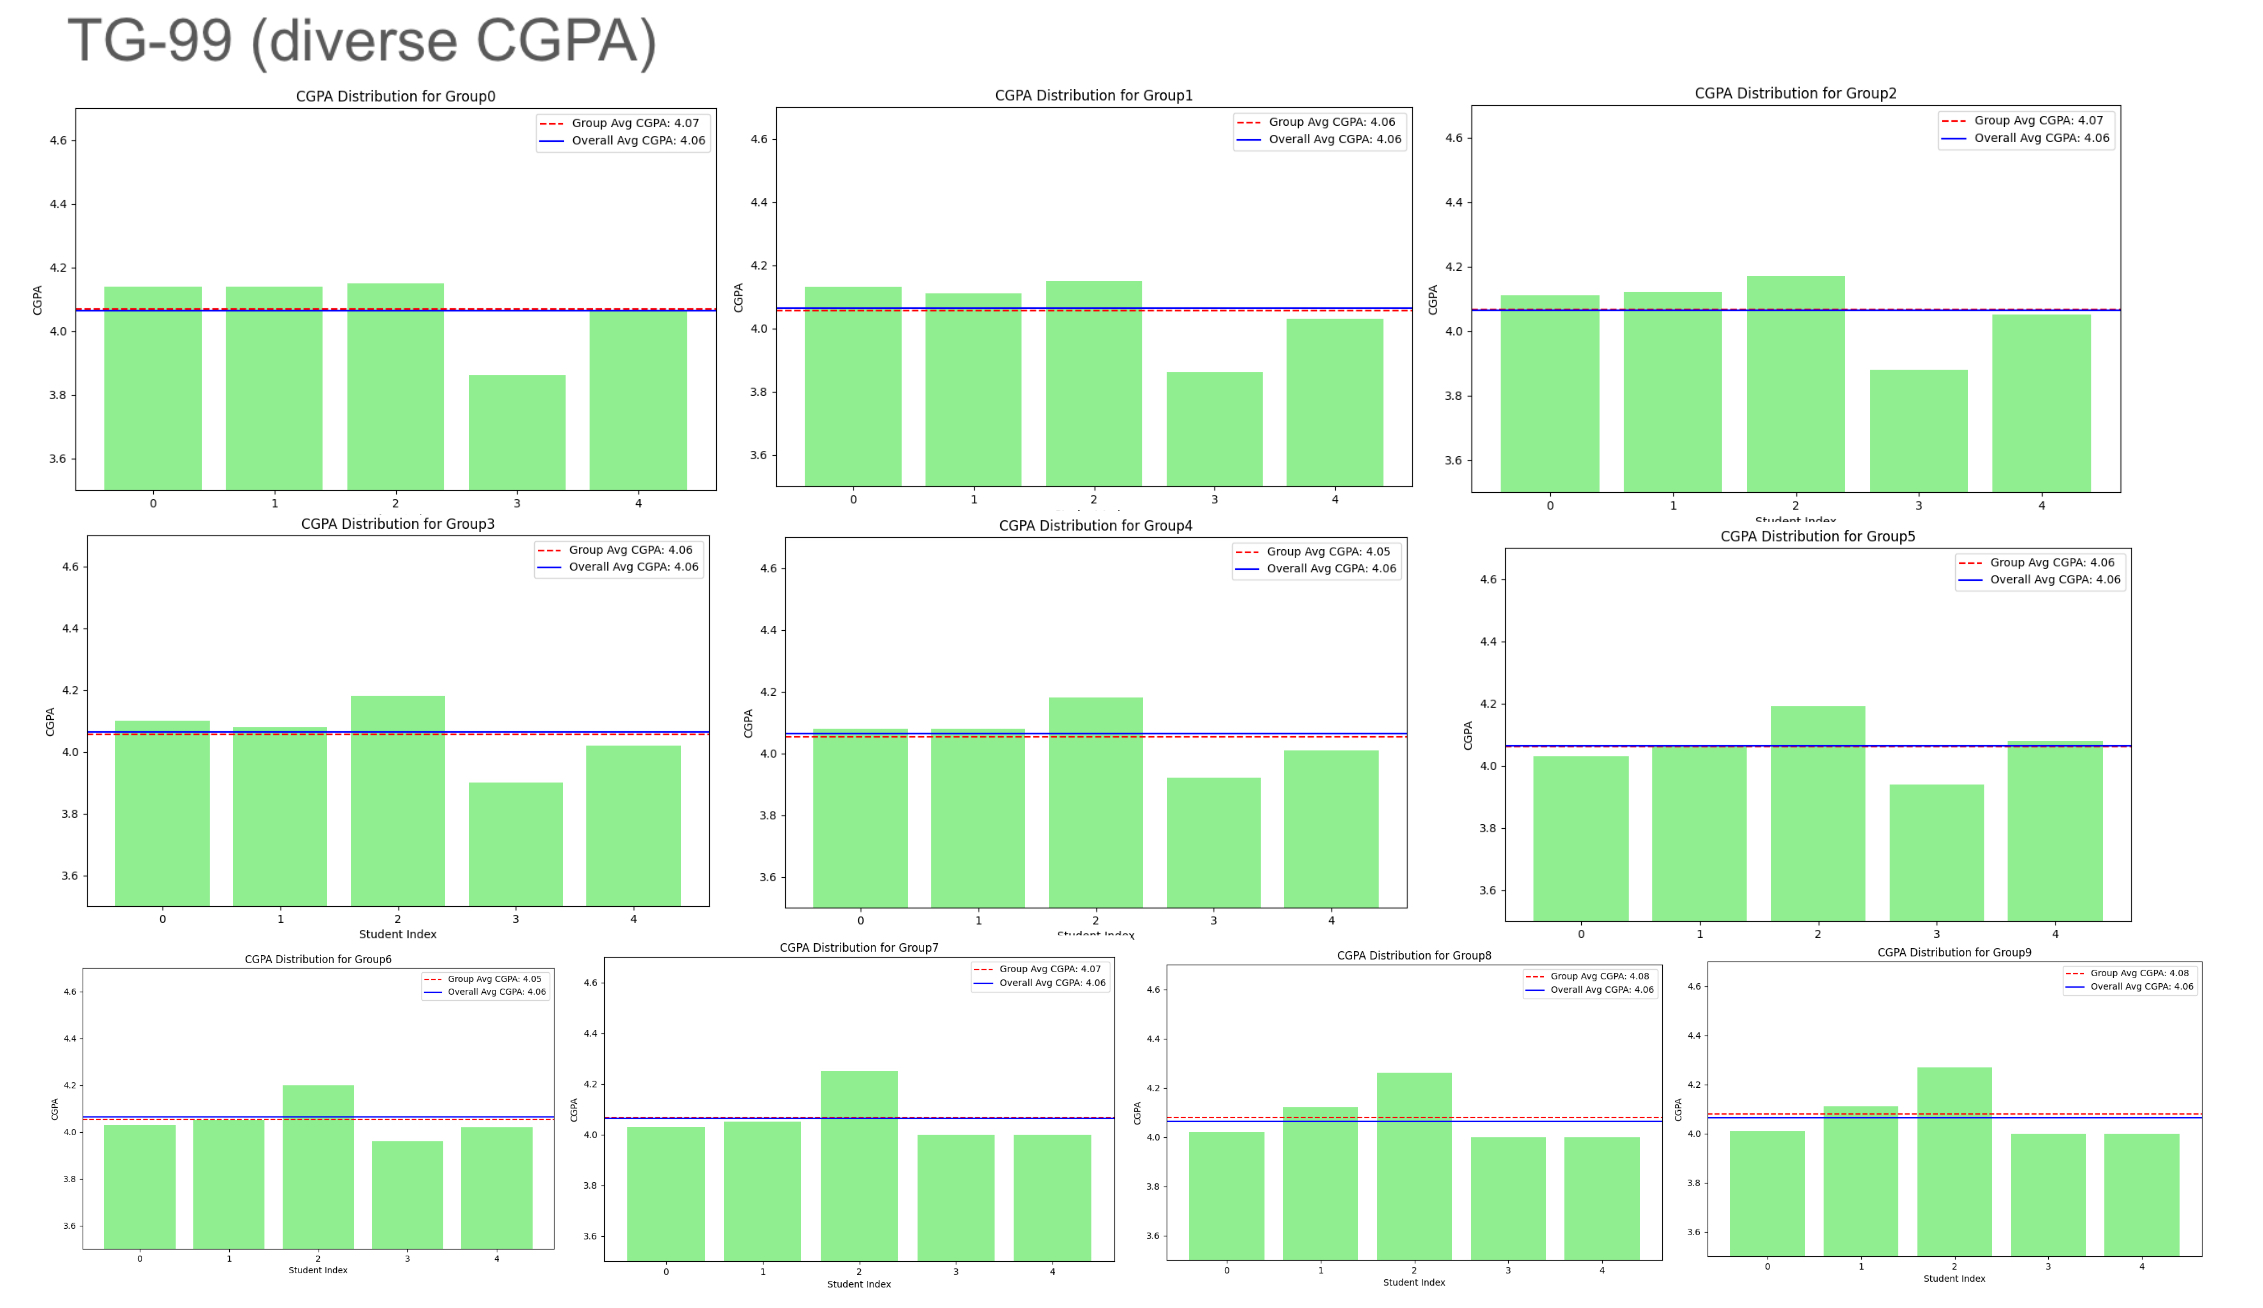

The graphs illustrate the individual CGPA values for each assigned group in tutorial groups 99.

Tutorial group 99 showcases how the vast majority of assigned groups look like.


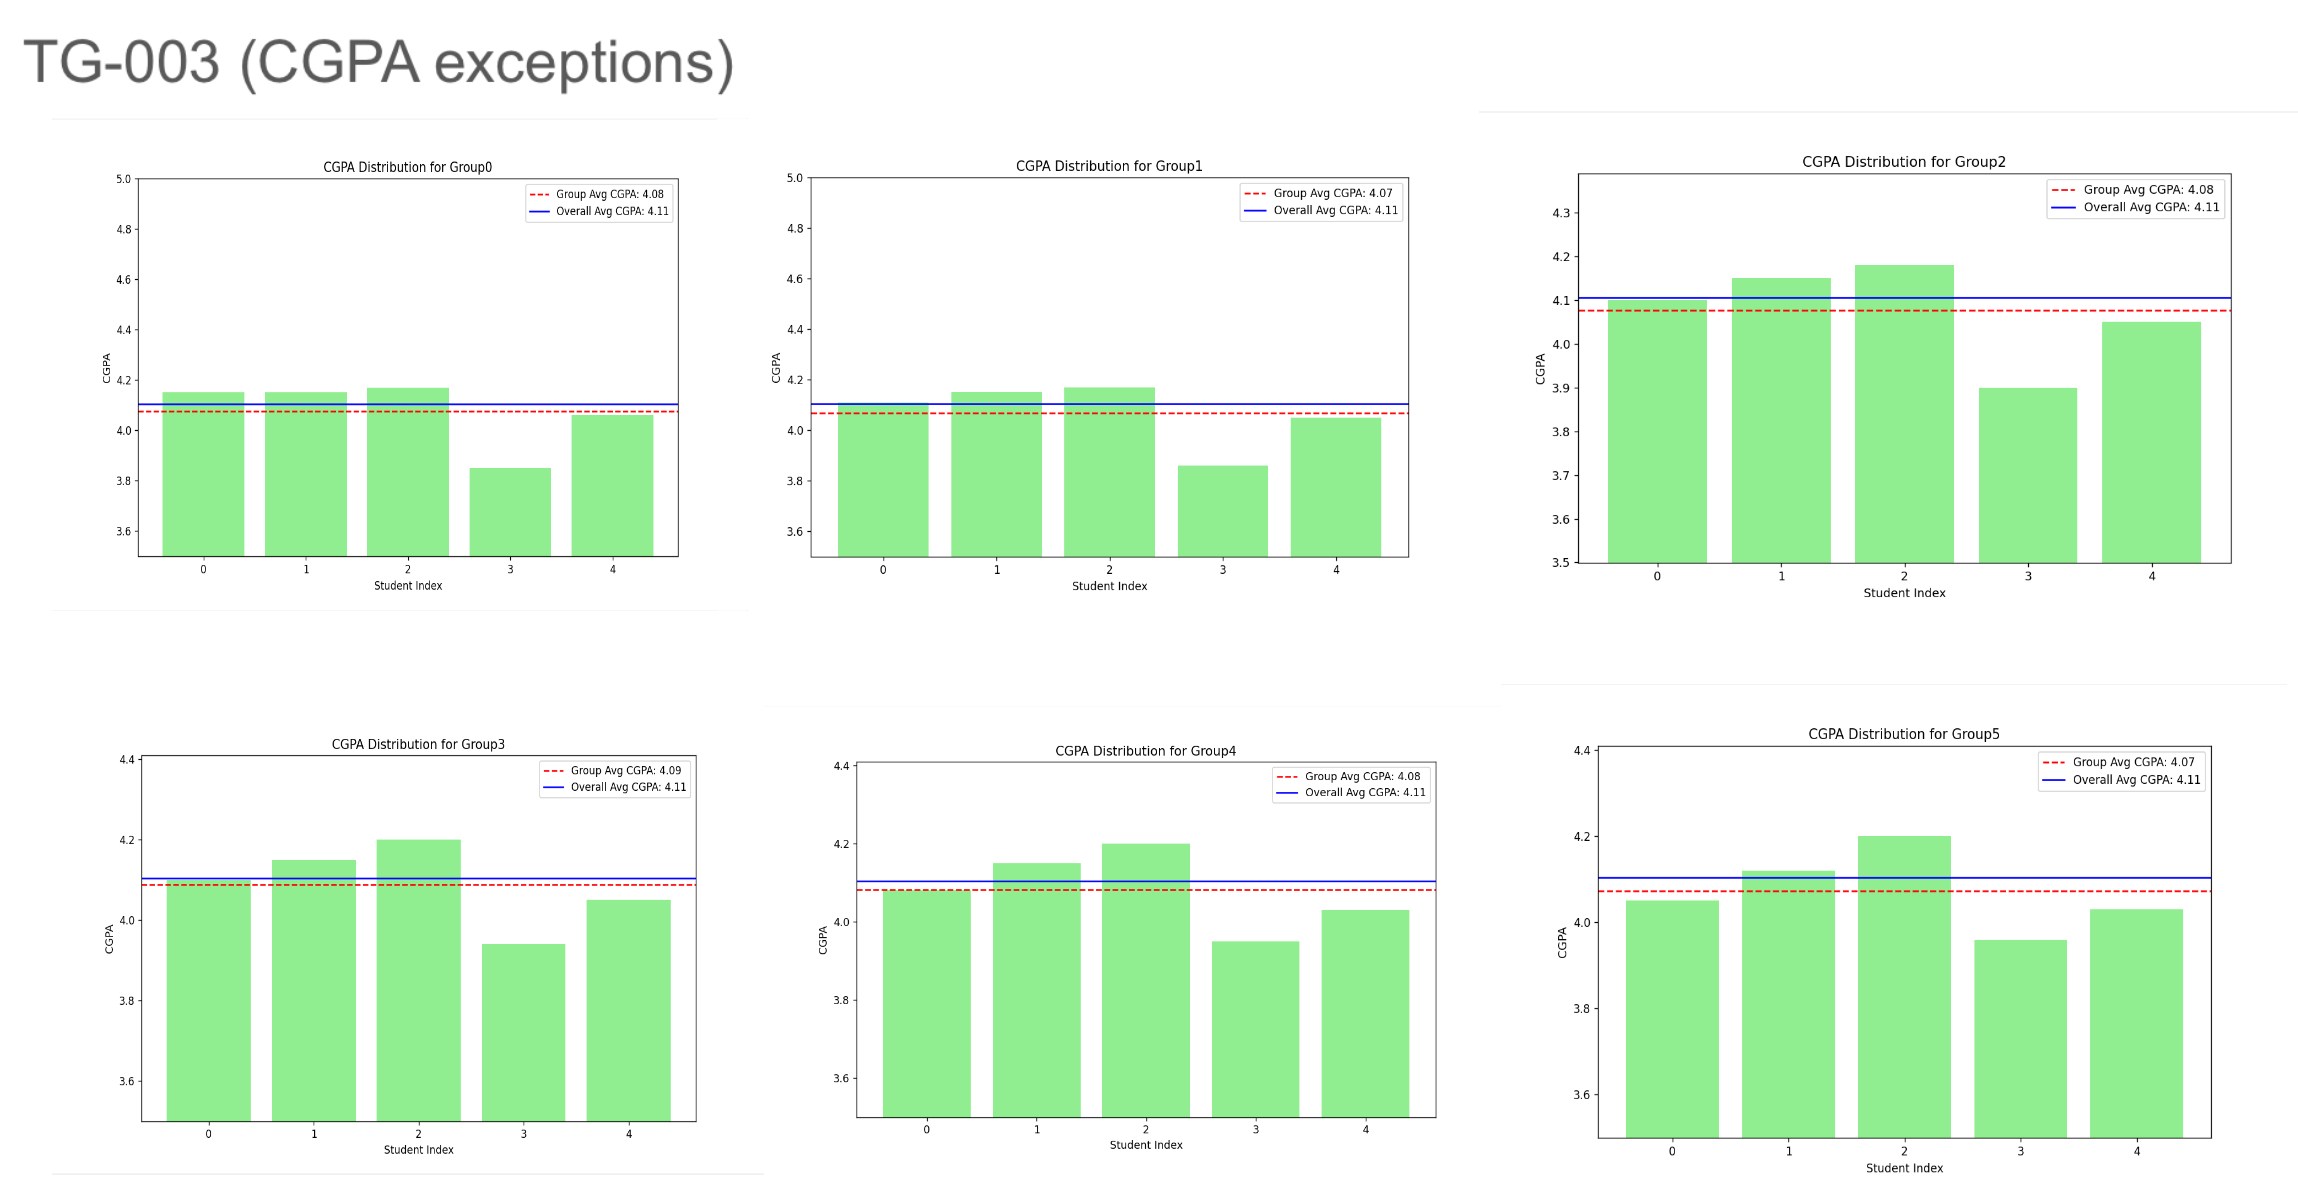

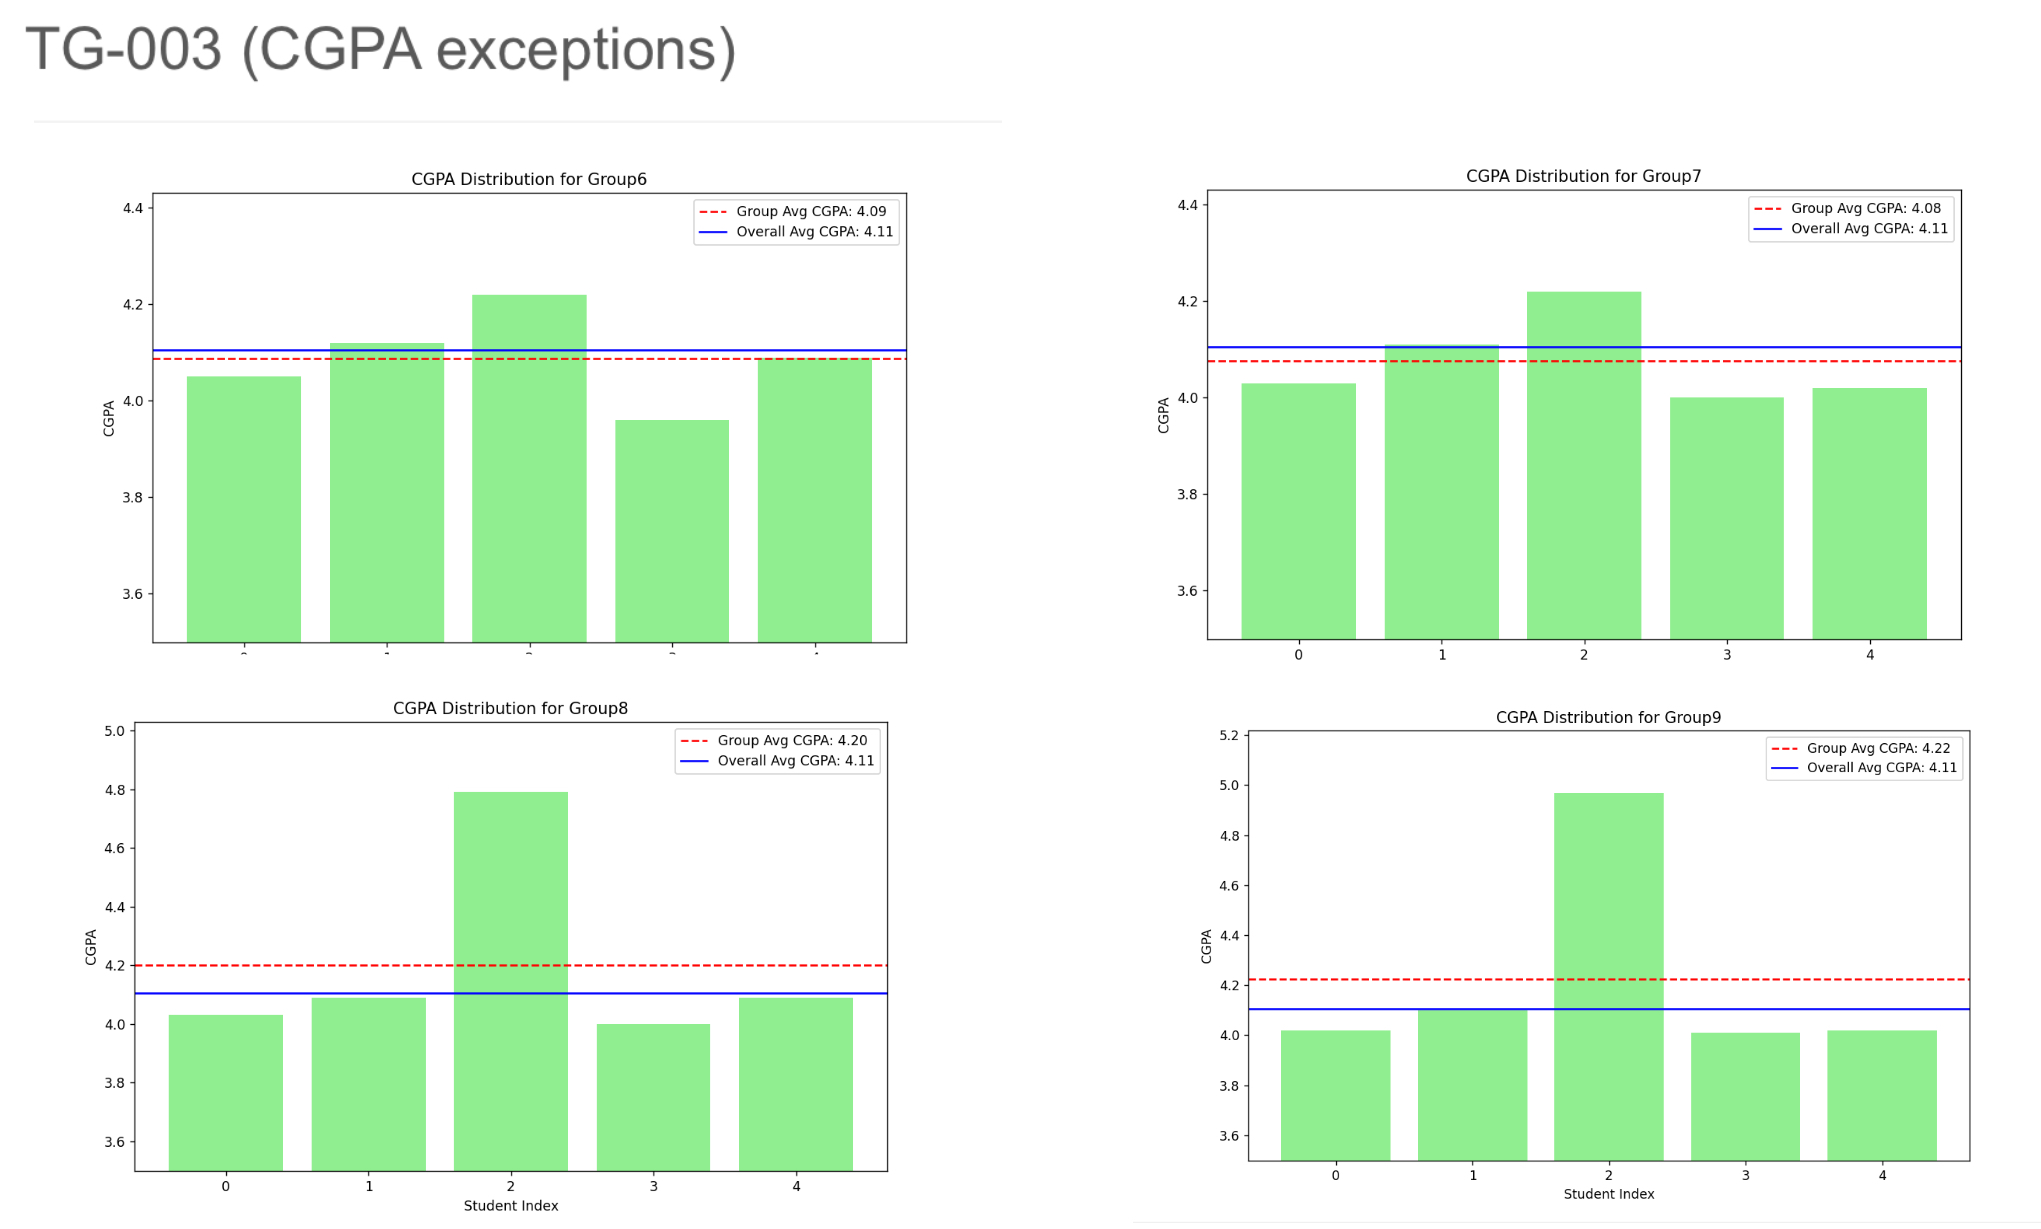

The graphs illustrate the individual CGPA values for each assigned group in tutorial groups 3.

Tutorial group 3 is an outlier group with an average CGPa that most exceeds the overall average.

The presence of outlier data is primarily caused by CGPA values that far exceed other values. This is of course a rare occurrence. For example, Hunter in group 3 has a cgpa of 4.97. The minimum cgpa in the whole data set is only 3.7 which makes it extremely difficult to ensure that the assigned group cgpa value is close to the overall cgpa value without sacrificing other diversity metrics.

## Gender Analysis

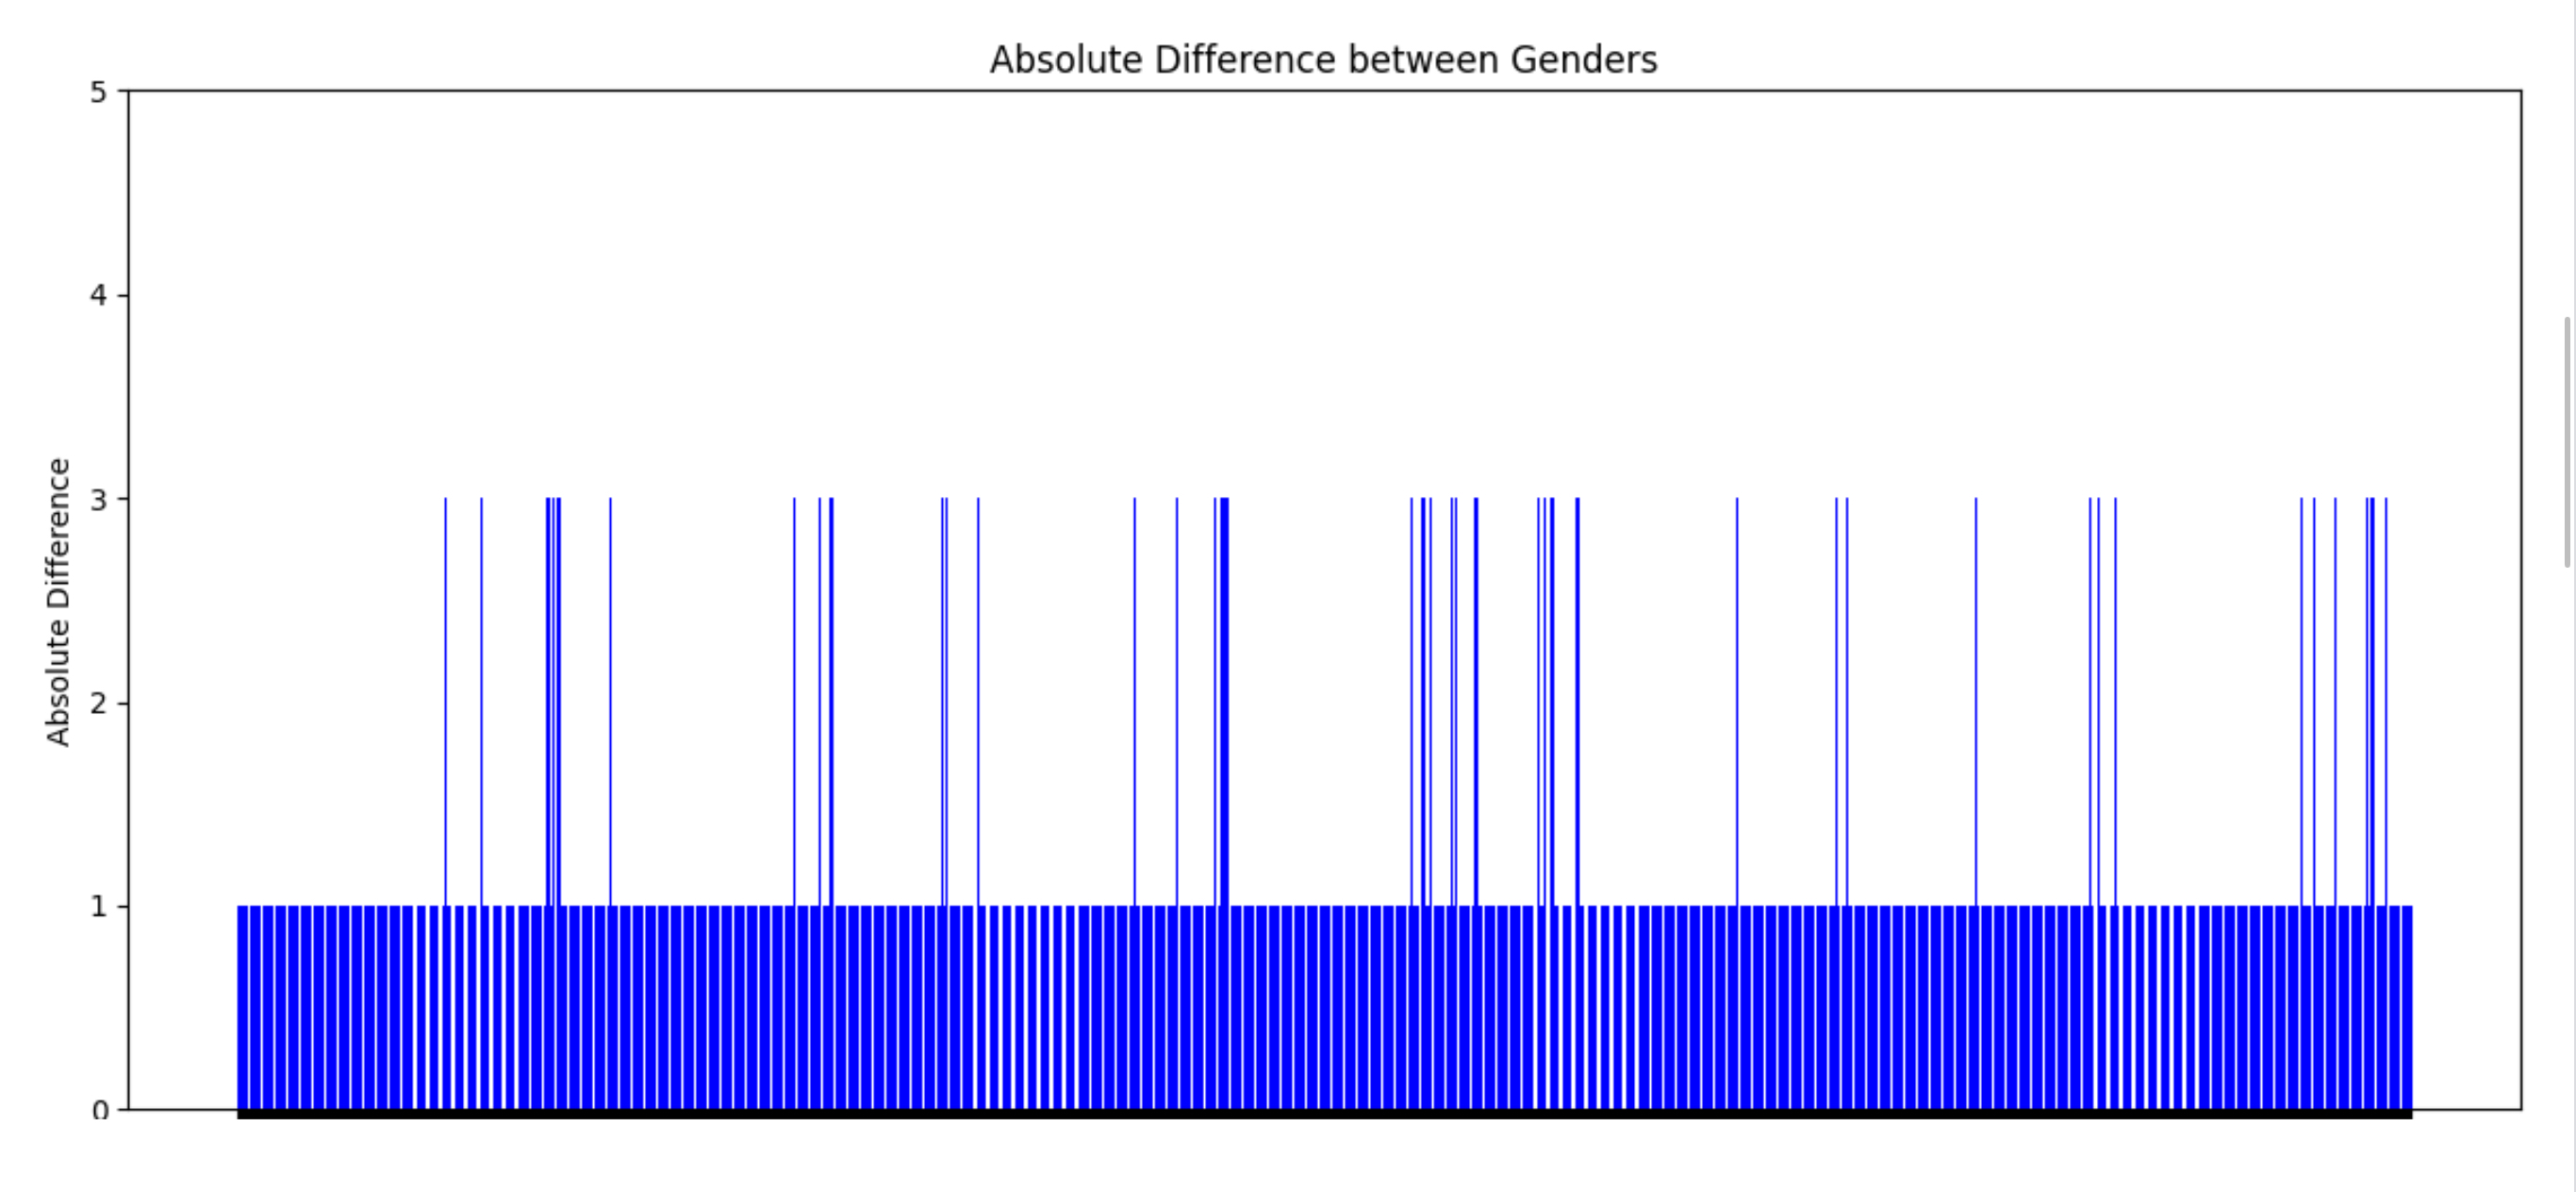

From the graph of gender difference against groups, it shows that the most common scenario is the case of gender difference of 1 (3 of one gender and 2 of another) alongside 78 cases of gender difference of 3 (4 is to 1 gender ratio). This shows that our code is able to effectively sort students into groups of diverse gender majority of the time, ensuring gender is always diverse.

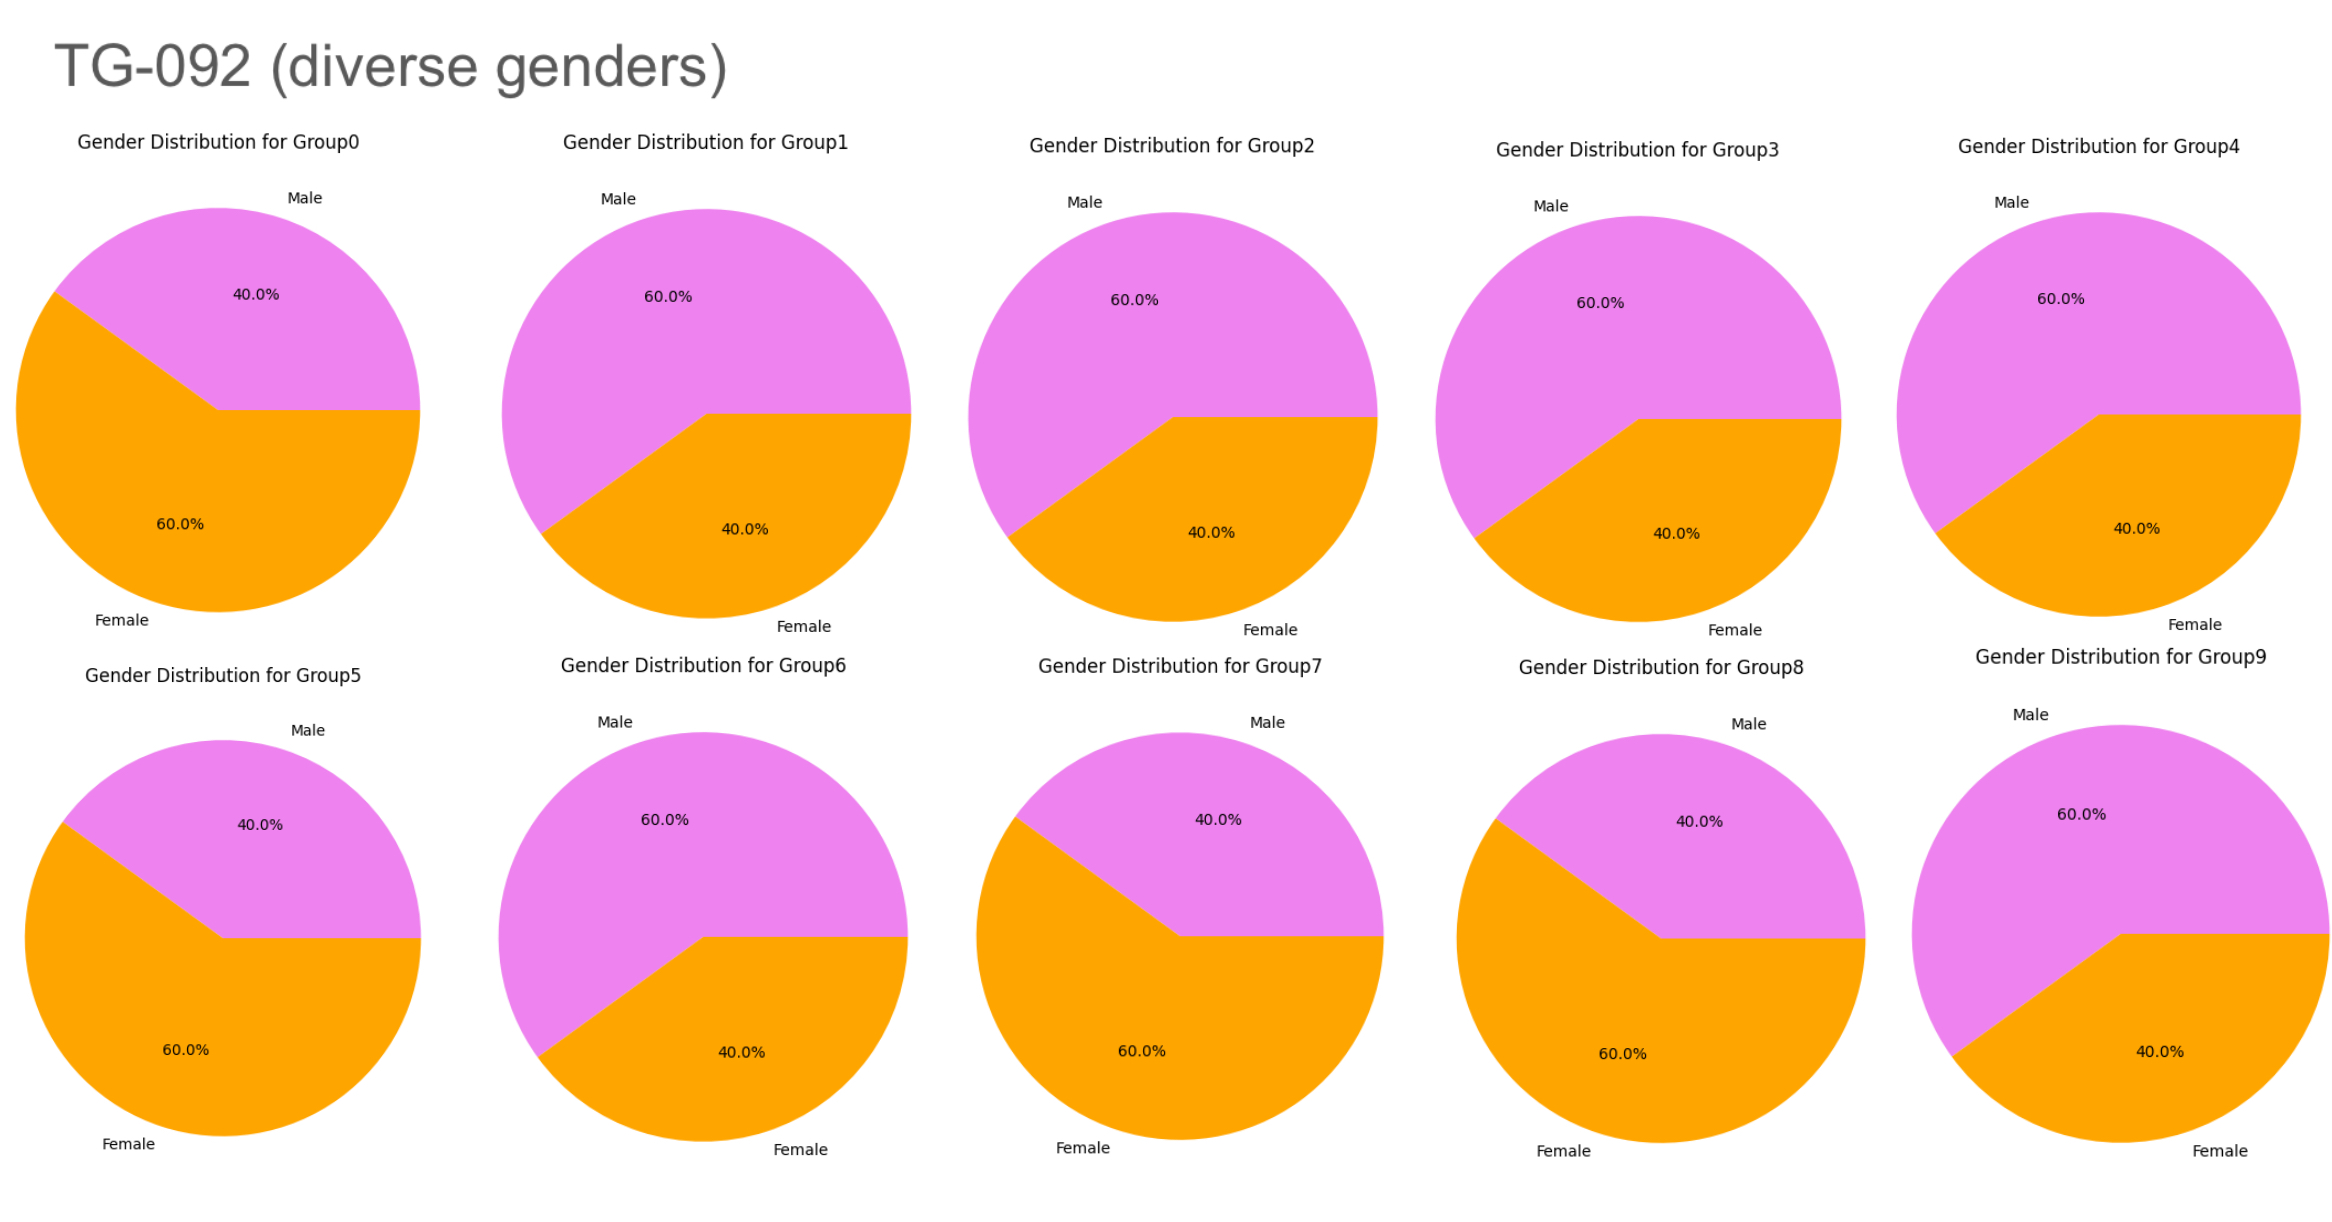

Looking at Tutorial Group 092, the 10 individual group pie-charts shows a gender diverse group of students, with each group having a 3 to 2 gender ratio. This analysis represents the most common scenario in which students of different genders are effectively sorted, showing that our code is able to ensure gender diversity.

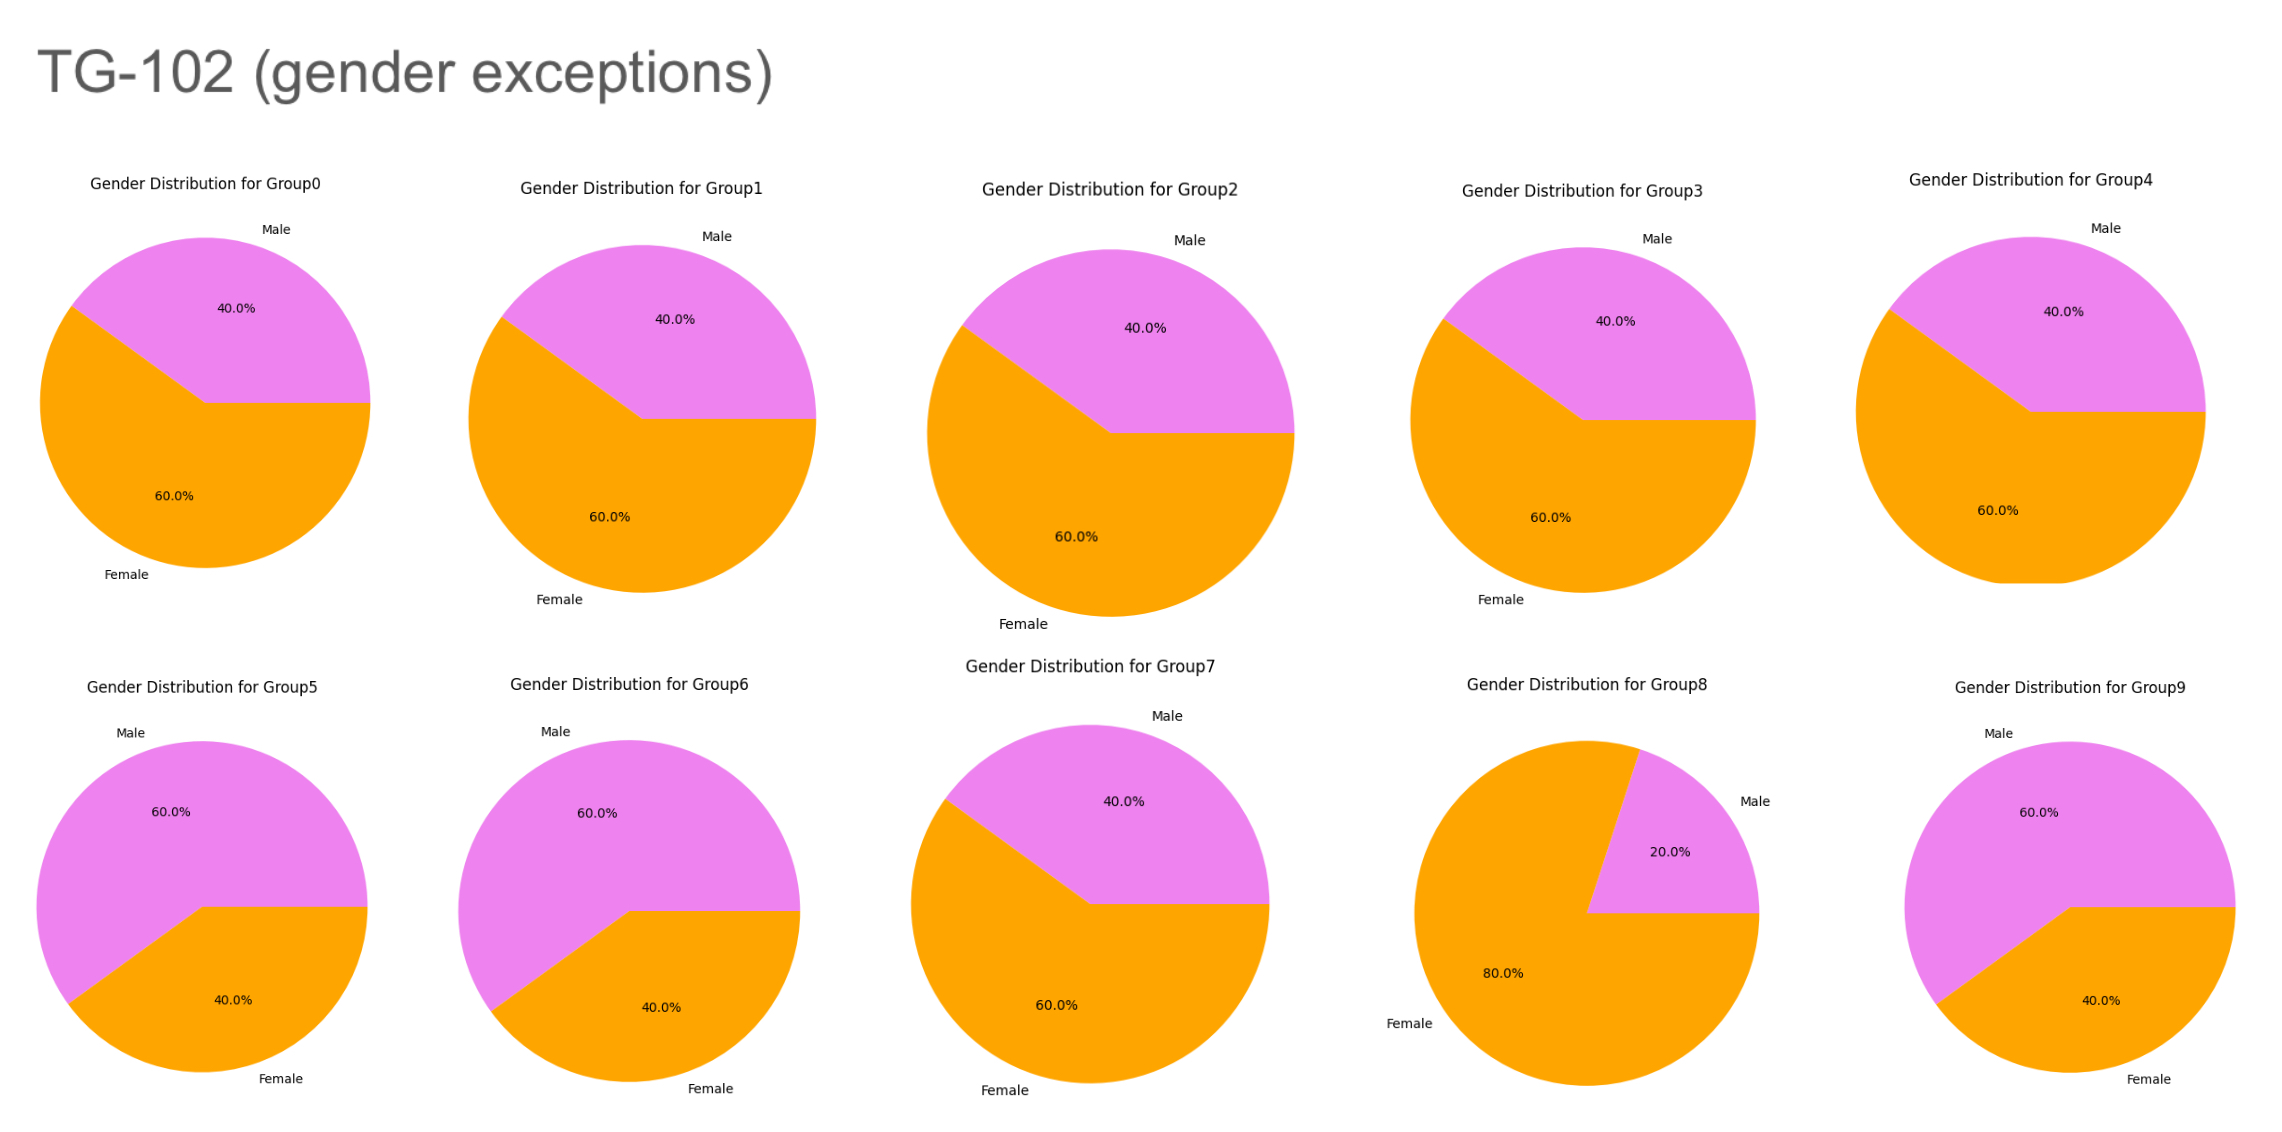

Looking at an exception case in Tutorial Group 102,  Tutorial Group 102 presents a scenario where group 8 has a gender ratio of 4 to 1 instead of the common 3 to 2 gender ratio. This case only appears in 78 out the 1200 possible individual groups (93.5%) while the case of 5 to 0 gender ratio is non-existent. Since such cases like very unlikely, especially after factoring in diverse CGPAs and diverse schools, we deem it acceptable as it might conversely affect the other factors otherwise.

## School Analysis

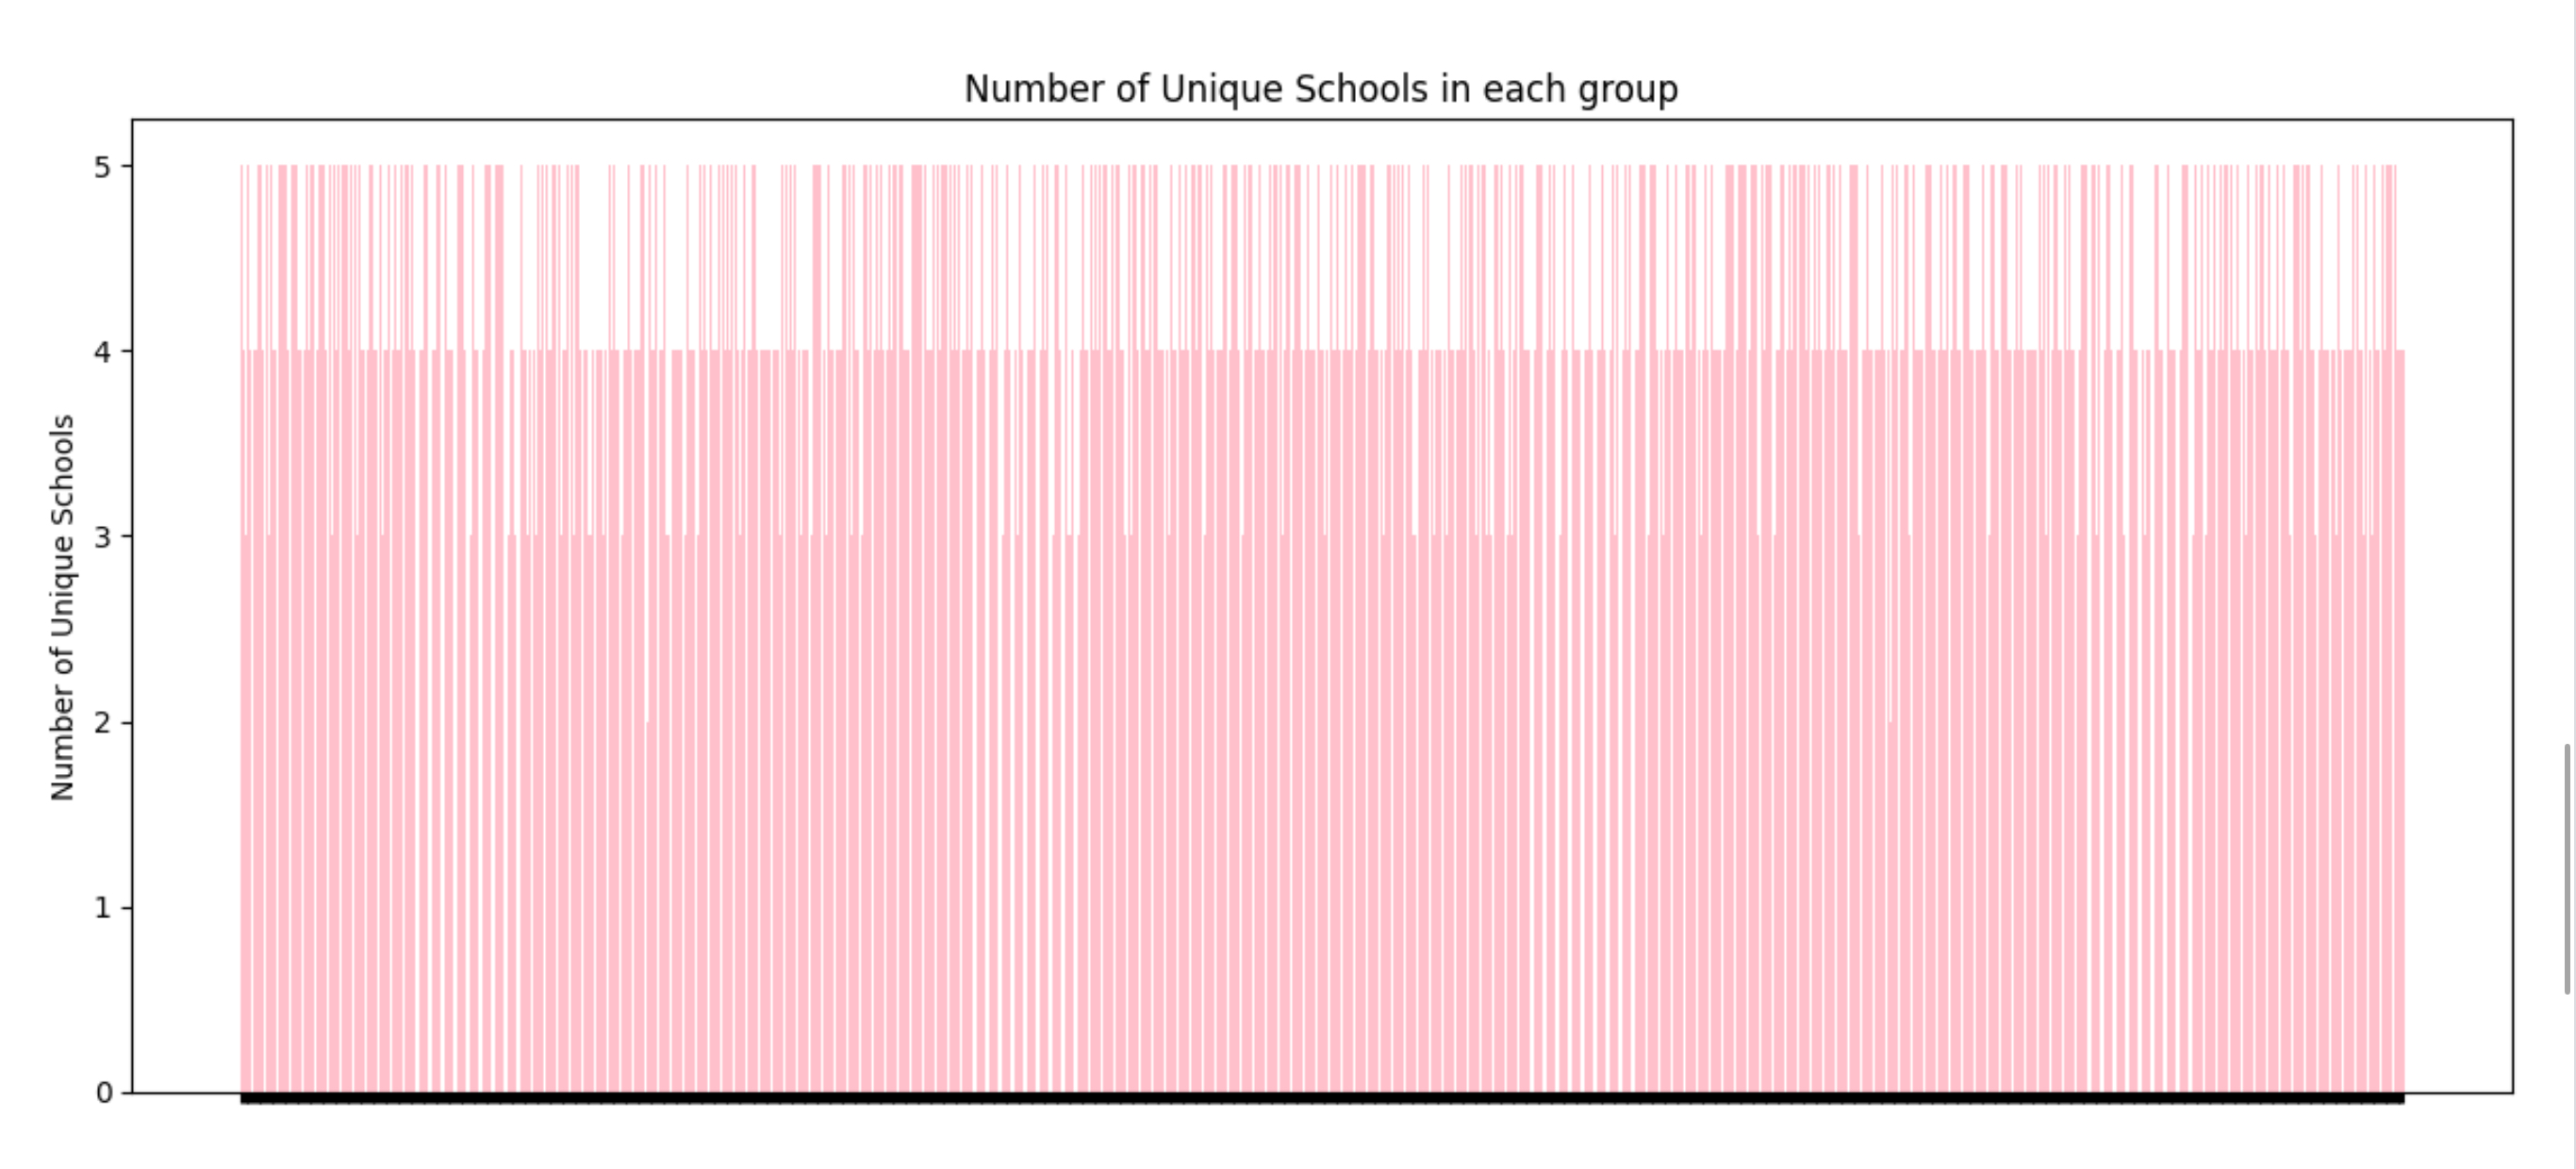

From the graph of distinct schools against groups, it shows the most of the groups was formed by 3 or more distinct schools. Therefore, our code is able to effectively ensure groups have students from the diverse spread of schools

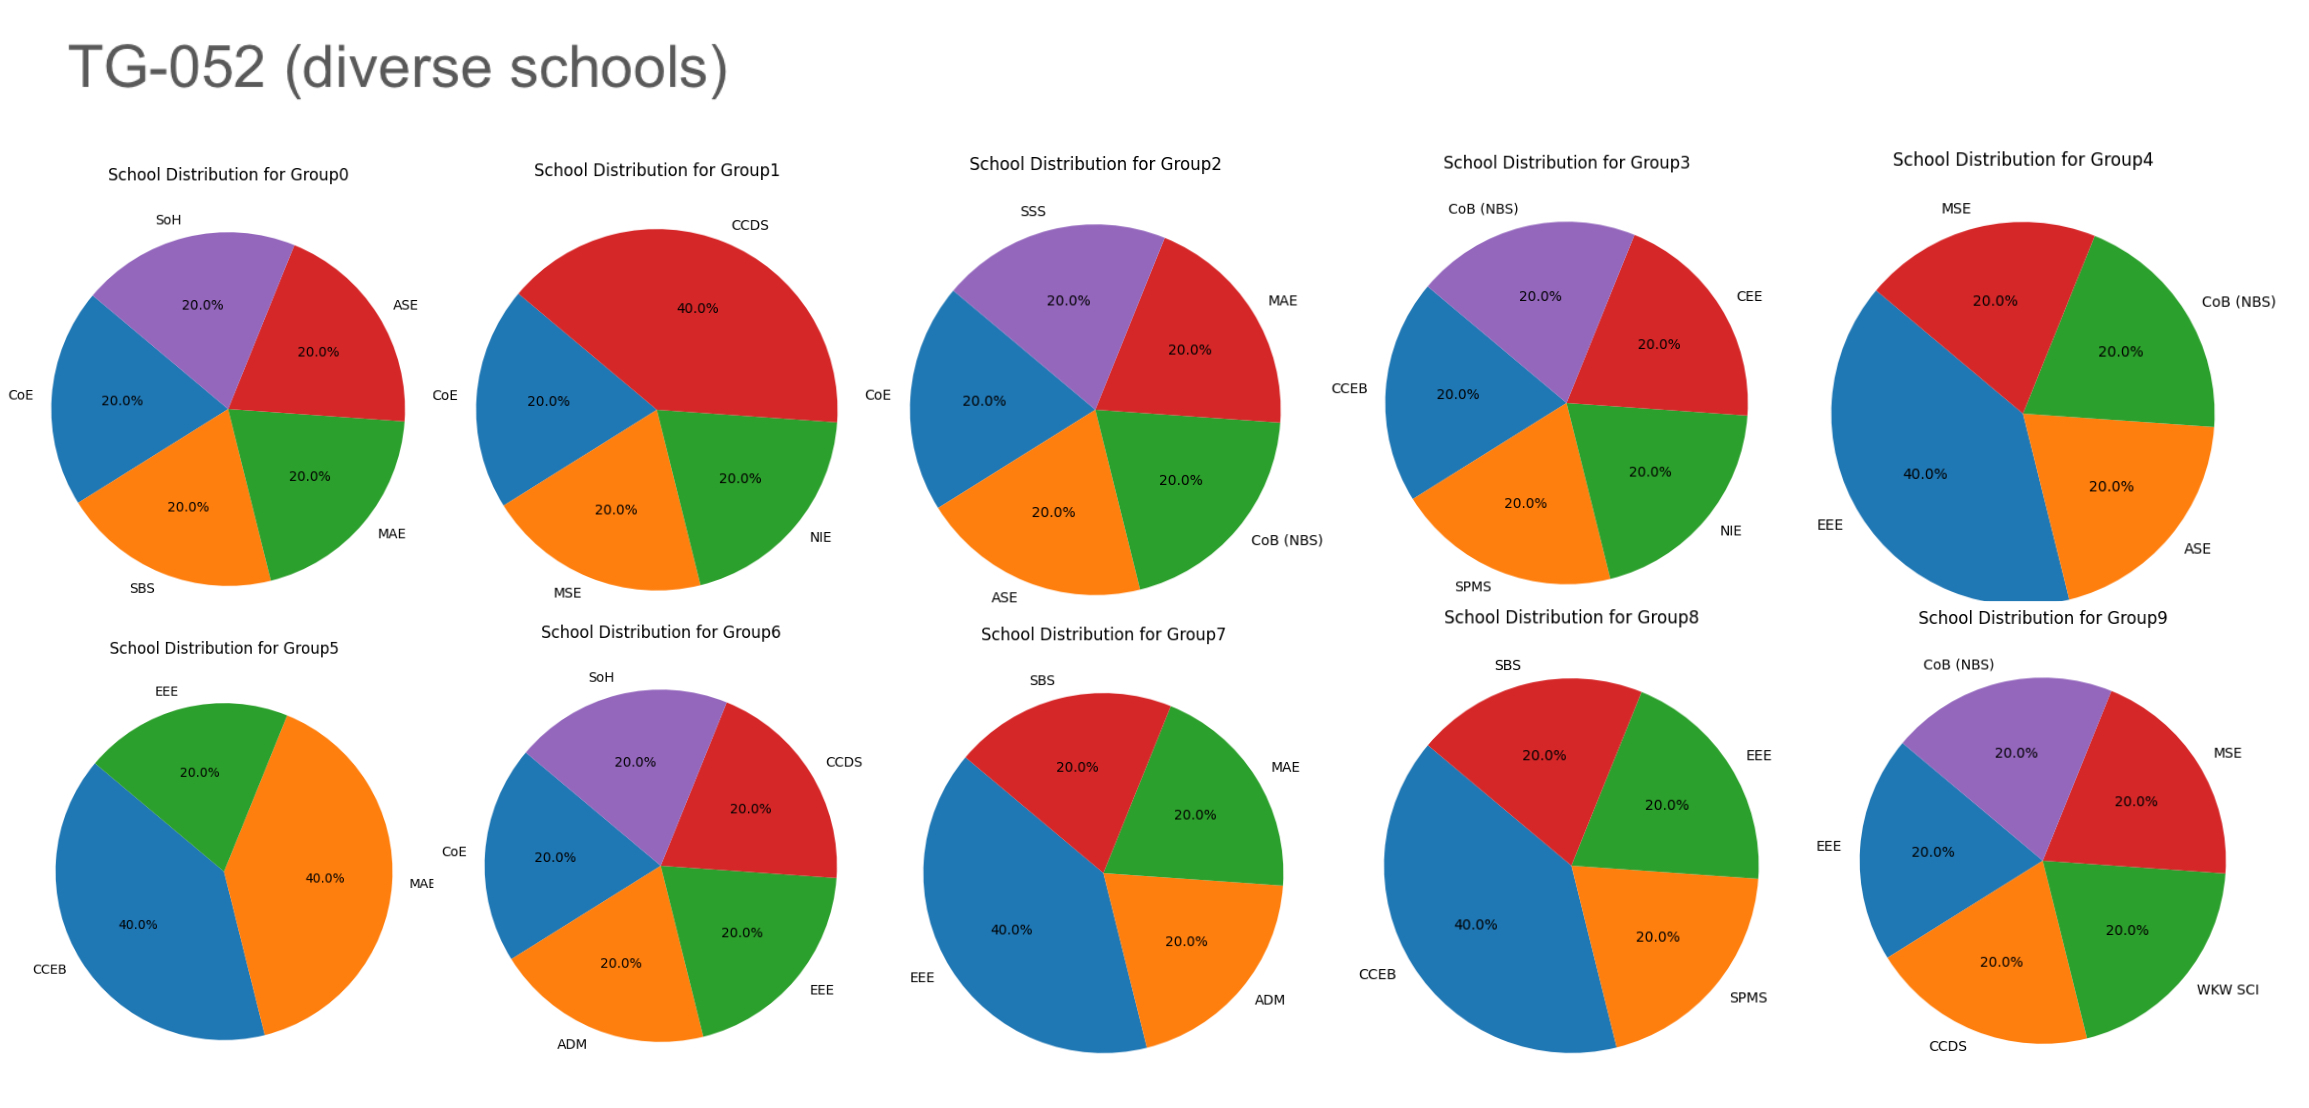

Looking at Tutorial Group 52, the 10 individual pie-chart present a tutorial group where each group has 3 or more distinct schools present. This analysis shows the most common scenario in how groups are sorted, often ensuring each group have students from distinct schools. Therefore, it ensures a diverse selections of schools in each group in the output.

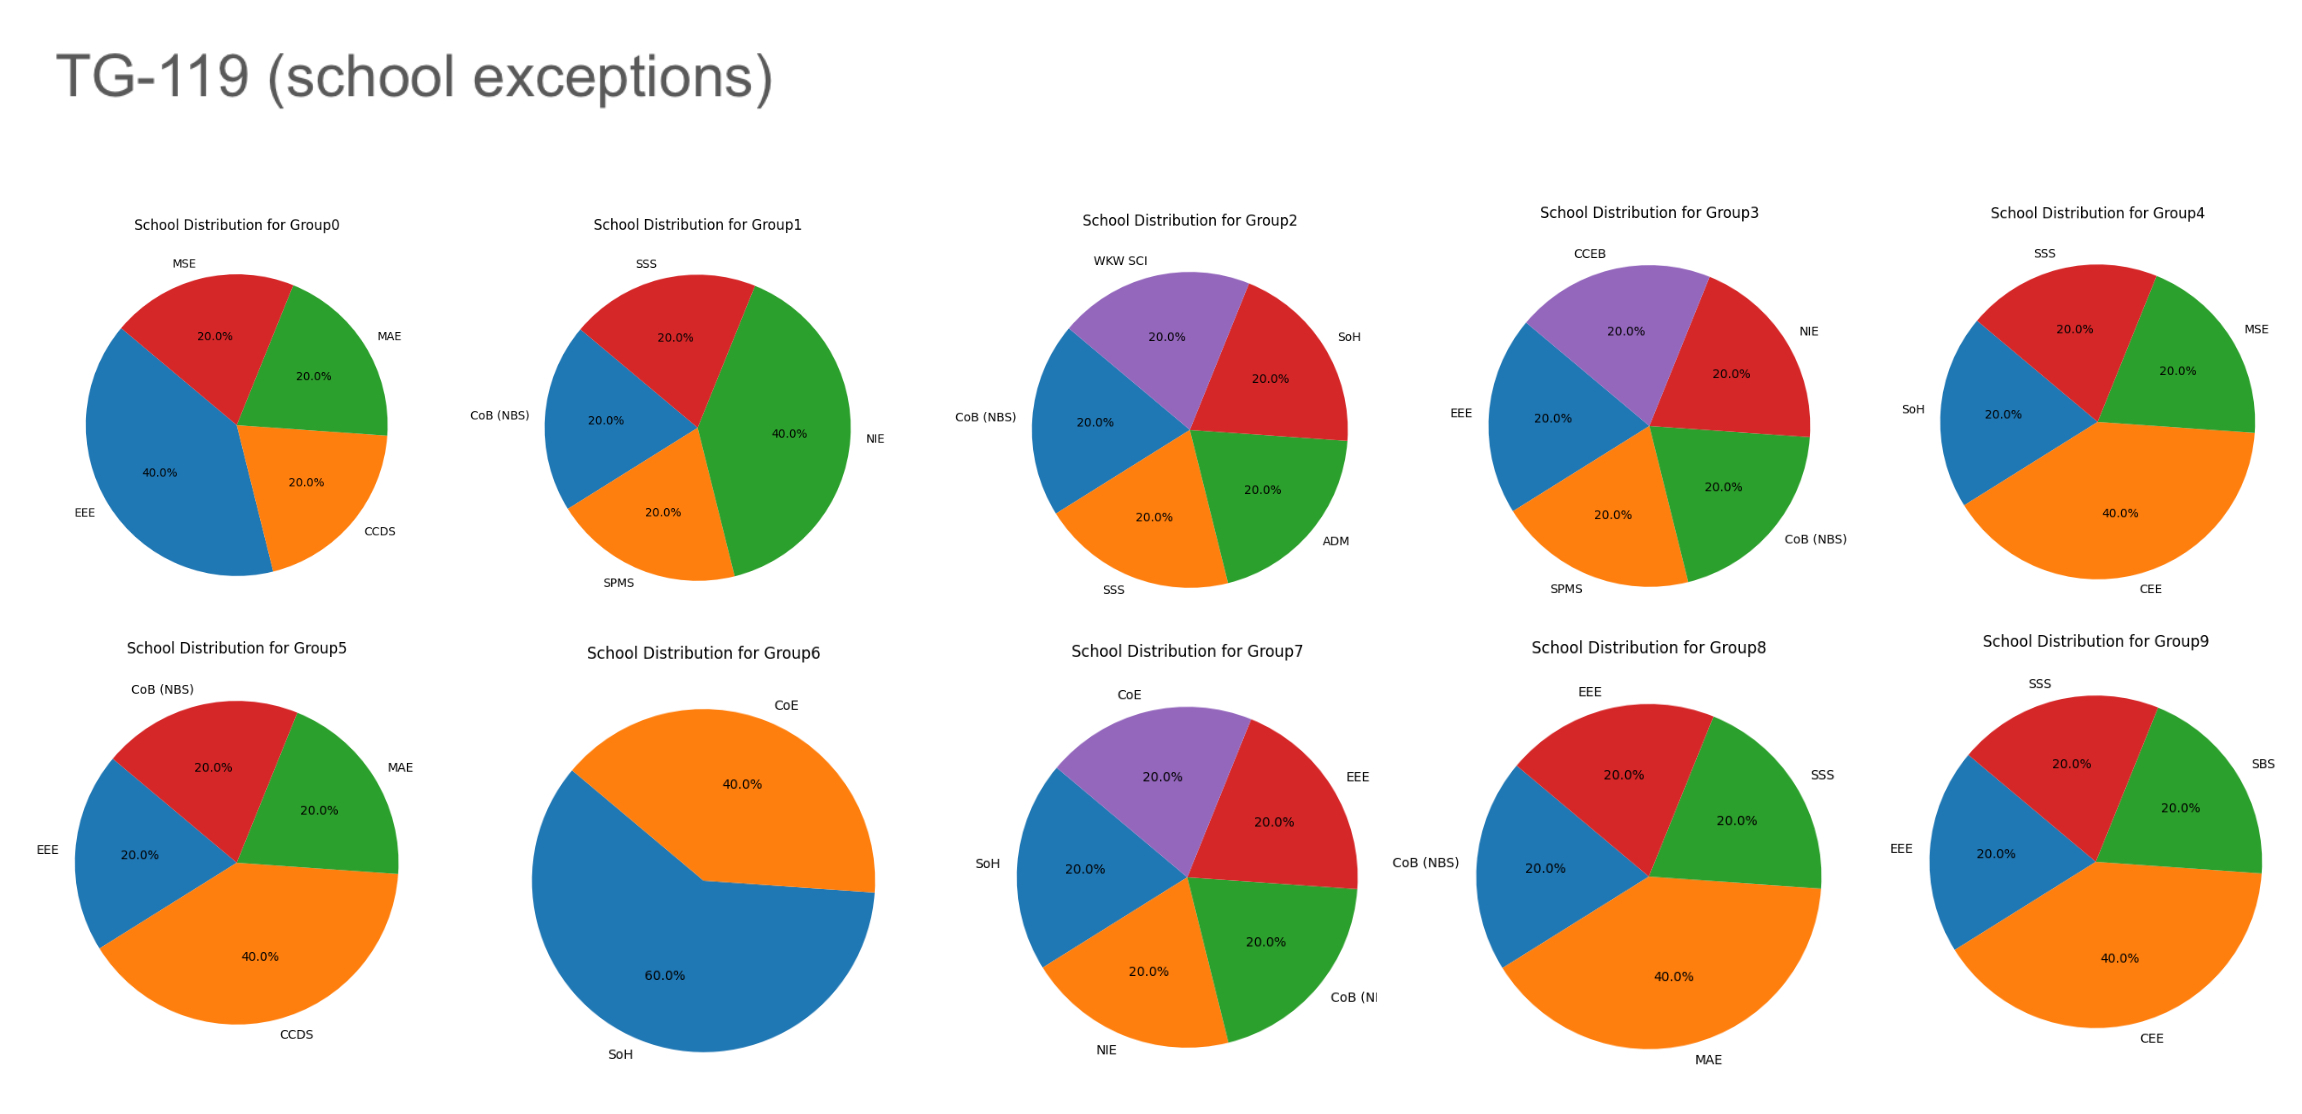

Looking at an exception case in Tutorial Group 119, group 6 presents a unlikely case where there is only 2 distinct schools in the group. However, such cases where a group has less than 3 distinct schools are 2 out of 1200 possible groups (99.83%), which is highly unlikely. Therefore, after factoring groups with diverse genders and diverse CGPA, we deem such cases to be acceptable as such are extremely unlikely.

# Computational Thinking

## Problem Decomposition

To group students in one particular tutorial group based on these criteria:
- 5 students in each group
- 3:2 gender ratio
- At least 3 distinct schools within 1 group
- Acceptable deviation as a measure of a fair CGPA distribution

## Abstraction

To simplify the process of assigning students from a particular tutorial groups, we first remove the need to consider the CGPA criteria. This is done by removing the top 10 and bottom 10 students from one particular tutorial group. Hence, we can focus on assigning the first 2 students from the middle 30 to each group solely based on the gender and school criteria. After that, we can then assign the next 2 students from the top 10 and bottom 10 to average out their CGPA.

## Algorithm Planning

The algorithm is as follows :
1. Data loading and Sorting for each tutorial group
2. GPA Ranking :Rank students in one tutorial group based on their CGPA
3. Grouping based on school : assign first students in each group based on school
4. Grouping based on gender : assign second students in each group based on gender
5. Grouping based on CGPAS : assign third and fourth students based on their CGPAs
6. Second Grouping based on gender : safety net for fair gender distribution

# Code to Run

In [ ]:
all_deviations = []
all_genders = []
all_schools = []

def main():
    # Load all students into a list
    all_students = load_data()

    # Create a clean csv file with relavant headings
    with open("FCE2_Team1.csv", "w") as file:
        file.write("Tutorial Group,Student ID,School,Name,Gender,CGPA,Team Assigned\n")

    # Loop for 120 tutorial groups
    for i in range(120):
        # Initialise dictionary containing student data in current tutorial group
        students_dict = init_new_dict(all_students)

        # Initialise list of student ids for easy reference
        id_list = init_id_list(all_students)

        # Remove the first 50 entries from all_students list
        all_students = all_students[50:]

        # Initialise sorted_CGPA which contains student ids in order of ascending GPAs
        sorted_CGPA = CGPAmergesort(id_list, students_dict)

        # Initialise dictionary for assigned groups
        group_dict = initialise_groups()

        # Separate top and bottom 10 students from sorted_CGPA
        high_GPA, low_GPA = init_high_low_GPA(sorted_CGPA)

        # Initialise dictionary to compare popularity of schools within remaining students in sorted_CGPA
        school_dict = init_school_dict(sorted_CGPA, students_dict)

        # Place popular schools into a list
        popular_schools = find_popular_schools(school_dict)

        # Distribute first ten students to assigned groups and delete these ten from sorted_CGPA
        distribute_schools(sorted_CGPA, popular_schools, students_dict, group_dict)

        # Assign second student opposite to the gender of the first student and delete these ten from sorted_CGPA
        distribute_gender(sorted_CGPA,students_dict, group_dict)

        # Exhaust high_GPA and low_GPA lists for third and fourth students for each group respectively
        distribute_high_GPA(high_GPA, students_dict, group_dict)
        distribute_low_GPA(low_GPA,students_dict,group_dict)

        # Find groups that have three out of existing four, of the same gender
        flagged_groups = evaluate_priority(group_dict)

        distribute_to_flagged(flagged_groups, sorted_CGPA,students_dict,group_dict)

        # Distribute remaining in sorted_CGPA to remaining assigned groups
        distribute_remaining(sorted_CGPA,students_dict, group_dict)

        # # CASE FOR USING evaluate_priority() INSTEAD
        # lazy_distribute_remaining(sorted_CGPA, students_dict, group_dict)

        # Formatting for export into FCE2_Team1.csv
        results = formatting_for_export(group_dict)

        # Exports into new FCE2_Team1.csv
        export(results)

        # Analyse distribution
        tut_grp = students_dict[high_GPA[0]][0]
        analysis(tut_grp,students_dict, group_dict,id_list)

    # Analysis compared to all 120 tutorial groups
    total_analysis()


def load_data():
    all_students_list = []
    with open("FCE2_Team1.csv", "r") as myfile:
        p = myfile.readlines()[1:]
        for i in p:
            x = i.split(",")
            all_students_list.append(x)
    return all_students_list


def init_new_dict(students_list):
    students_dict = {}
    for i in range(50):
        x = students_list[i]
        students_dict.update({int(x[1]) : [x[0] , int(x[1]) , x[2] , x[3] , x[4] , float(x[5].split("\n")[0])]})
    return students_dict


def init_id_list(all_students_list):
    id_list = []
    for i in range(50):
        id_list.append(int(all_students_list[i][1]))
    return id_list


def CGPAmergesort(theIDs, mydict):
    dictlen = len(theIDs)

    if dictlen < 2:
        return theIDs

    leftID = theIDs[:dictlen // 2]
    rightID = theIDs[dictlen // 2:]

    leftID = CGPAmergesort(leftID, mydict)
    rightID = CGPAmergesort(rightID, mydict)

    return CGPAmerge(leftID , rightID, mydict)

def CGPAmerge(leftID , rightID, mydict):
    resultIDlist = []

    while leftID and rightID:
        L = leftID[0]
        R = rightID[0]

        if float(mydict[L][5]) >= float(mydict[R][5]):
            resultIDlist.append(L)
            leftID.pop(0)
        else:
            resultIDlist.append(R)
            rightID.pop(0)

    if leftID:
        resultIDlist.extend(leftID)
    else:
        resultIDlist.extend(rightID)

    return resultIDlist


def initialise_groups():
    group_dict = {}
    for i in range(10):
        group_dict[f"Group{i}"] = []
    return group_dict


def init_high_low_GPA(sorted_CGPA):
    high_GPA = []
    low_GPA = []
    for i in range(10):
        high_student = sorted_CGPA[0]
        high_GPA.append(high_student)
        sorted_CGPA.remove(high_student)

        low_student = sorted_CGPA[-1]
        low_GPA.append(low_student)
        sorted_CGPA.remove(low_student)
    return high_GPA, low_GPA


def init_school_dict(sorted_CGPA, students_dict):
    school_dict = {}
    for i in range(30):
        school = students_dict.get(sorted_CGPA[i])[2]
        if school not in school_dict:
            school_dict[school] = 1
        else:
            school_dict[school] += 1
    return school_dict


def find_popular_schools(school_dict):
    popular_schools = []
    count = 0

    while count < 10:
        school = max(school_dict,key=school_dict.get)
        no_of_students = school_dict[school]
        count += no_of_students
        popular_schools.append(school)
        school_dict.pop(school)

    return popular_schools


def distribute_schools(sorted_CGPA, popular_schools, students_dict, group_dict):
    delete_list = []
    counter = 0
    for i in range(len(sorted_CGPA)):
        if students_dict[sorted_CGPA[i]][2] in popular_schools:
            if counter == 10:
                break
            group_dict[f"Group{counter}"].append(students_dict[sorted_CGPA[i]])
            delete_list.append(sorted_CGPA[i])
            counter+=1

    for i in delete_list:
        sorted_CGPA.remove(i)


def distribute_gender(sorted_CGPA, students_dict, group_dict):
    male_list = []
    female_list = []

    for i in sorted_CGPA:
        if students_dict[i][4] == "Male":
            male_list.append(i)
        else:
            female_list.append(i)

    for i in group_dict:
        if group_dict[i][0][4] == "Male":
            if len(female_list) > 0:
                group_dict[i].append(students_dict[female_list[0]])
                sorted_CGPA.remove(female_list[0])
                female_list.remove(female_list[0])
            else:
                group_dict[i].append(students_dict[male_list[0]])
                sorted_CGPA.remove(male_list[0])
                male_list.remove(male_list[0])

        else:
            if len(male_list) > 0:
                group_dict[i].append(students_dict[male_list[0]])
                sorted_CGPA.remove(male_list[0])
                male_list.remove(male_list[0])
            else:
                group_dict[i].append(students_dict[female_list[0]])
                sorted_CGPA.remove(female_list[0])
                female_list.remove(female_list[0])


def distribute_high_GPA(high_GPA, students_dict, group_dict):
    for i in range(len(high_GPA)):
        group_dict[f"Group{9-i}"].append(students_dict[high_GPA[i]])


def distribute_low_GPA(low_GPA, students_dict, group_dict):
    for i in range(len(low_GPA)):
        group_dict[f"Group{i}"].append(students_dict[low_GPA[i]])


def evaluate_priority(group_dict):
    flagged_groups = []

    for i in group_dict:
        male = 0
        female = 0
        for j in group_dict[i]:
            if j[4] == "Male":
                male += 1
            else:
                female += 1

        if male >= 3 or female >= 3:
            str = ""
            if male > female:
                str = "Male"
            else:
                str = "Female"
            flagged_groups.append([i, str])
    return flagged_groups


def distribute_to_flagged(flagged_groups, sorted_CGPA, students_dict, group_dict):
    delete_list = []
    for i in sorted_CGPA:
        for j in flagged_groups:
            if len(group_dict[j[0]]) != 5:
                if students_dict[i][4] != j[1]:
                    delete_list.append(i)
                    group_dict[j[0]].append(students_dict[i])
                    break

    for i in delete_list:
        sorted_CGPA.remove(i)

def distribute_remaining(sorted_CGPA, students_dict, group_dict):
    index = 0
    for i in range(10):
        if len(group_dict[f"Group{i}"]) < 5:
            group_dict[f"Group{i}"].append(students_dict[sorted_CGPA[index]])
            index += 1

def lazy_distribute_remaining(sorted_CGPA, students_dict, group_dict):
    index = 0
    for i in group_dict:
        group_dict[i].append(students_dict[sorted_CGPA[index]])
        index+=1


def formatting_for_export(group_dict):
    result_list = []
    string = ""
    for i in group_dict:
            for k in group_dict[i]:
                k.append(i)

    for i in group_dict:
        for j in group_dict[i]:
            for k in j:
                string += str(k)
                string += ","
            string = string[:-1]
            string += "\n"
            result_list.append(string)
            string = ""
    return result_list

def export(results):
    with open("FCE2_Team1.csv", "a",newline="") as results_file:
        for i in results:
            results_file.write(i)

def analysis(tut_grp, students_dict, group_dict, id_list):
    # ANALYSIS
    group_gpa = []
    group_gender = []
    group_school = []

    for i in group_dict:
        temp_gpa = 0
        for j in group_dict[i]:
            temp_gpa += j[5]

        # GPA ANALYSIS
        group_gpa.append(round(temp_gpa/5, 2))

        # GENDER ANALYSIS
        male = 0
        female = 0
        for j in group_dict[i]:
            if j[4] == "Male":
                male += 1
            else:
                female += 1

        if male >= 4 or female >= 4:
            str = ""
            if male > female:
                str = "Male"
            else:
                str = "Female"
            group_gender.append([i, str])

        # SCHOOL ANALYSIS
        schools = []
        for j in group_dict[i]:
            schools.append(j[2])
        if len(set(schools)) <= 2:
            group_school.append([i])

    # TOTAL STATISTICS OF ONE TUTORIAL GROUP
    total_gpa = 0
    male = 0
    female = 0
    for i in id_list:
        total_gpa += students_dict[i][5]
        if students_dict[i][4] == "Male":
            male += 1
        else:
            female += 1
    ave_gpa = round(total_gpa/50, 2)
    max_dev = round(max(abs(gpa - ave_gpa) for gpa in group_gpa), 2)


    all_deviations.append(max_dev)
    if group_gender:
        all_genders.append([tut_grp, group_gender])

    if group_school:
        for i in group_school:
            all_schools.append(group_dict[i[0]])


def total_analysis():
    count = 0
    for i in all_genders:
        count += len(i[1])
    print()
    print("EFFECTIVENESS")
    print(f"GENDER: {100-round(count*100/1200, 2)}% PASSES")
    print(f"SCHOOLS: {100-round(len(all_schools)*100/1200 ,2)}% PASSES")
    print(f"MAXIMUM DEVIATION: {max(all_deviations)} POINTS")
    print()


if __name__ == "__main__":
    main()

FileNotFoundError: [Errno 2] No such file or directory: 'records.csv'